# <span style='font-family:sans-serif'><span style='color:maroon'>ACADEMY

## <span style='font-family:sans-serif'><span style='color:maroon'>Projet d'expansion à l'international

<span style='font-family:sans-serif'><span style='color:darkblue'> **Dans le contexte du projet d'expansion à l'internationel de nos services de formation en ligne destinés aux élèves de niveau lycée et université, ce document fait l'objet d'une analyse pré-exploratoire des données de la Banque Mondiale afin d'établir une visibilité sur la clientèle potentielle à l'étranger.**</span>

![](Image_Cours_En_Ligne.jpg)

<span style='font-family:sans-serif'><ins>**Voici les sources de données exploitée dans la pré-analyse :**</ins>
- [Dataset de la banque modiale](https://datacatalog.worldbank.org/search/dataset/0038480) 
- [liste des indicateurs](https://datatopics.worldbank.org/education/indicators)

### <span style='font-family:sans-serif'><ins>Table des matières</ins> :

* [Chapitre 1 : préparation](#chapter1)
    * [Section 1.1 : environnement de travail](#section_1_1)
    * [Section 1.2 : téléchargement](#section_1_2)
        * [Section 1.2.1 : les CSV](#section_1_2_1)
        * [Section 1.2.2 : les variables](#section_1_2_2)
        * [Section 1.2.3 : structure et dimensions](#section_1_2_3)
* [Chapitre 2 : filtrage](#chapter2)
    * [Section 2.1 : pays](#section_2_1)
        * [Section 2.1.1 : derniers rescensements](#section_2_1_1)
        * [Section 2.1.2 : niveaux de richesses](#section_2_1_2)
    * [Section 2.2 : indicateurs](#section_2_2)
    * [Section 2.3 : années](#section_2_3)
        * [Section 2.3.1 : restriction](#section_2_3_1)
        * [Section 2.3.2 : lignes vides](#section_2_3_2)
        * [Section 2.3.3 : valeurs récentes](#section_2_3_3)
        * [Section 2.3.4 : mise en forme](#section_2_3_4)
* [Chapitre 3 : analyse statistique](#chapter3)
    * [Section 3.1 : Réorganisation des variables](#section_3_1)
    * [Section 3.2 : Analyse](#section_3_2)
    * [Section 3.3 : Interprêtation ](#section_3_3)
    * [Section 3.4 : Détermination de scores par pays](#section_3_4)
    * [Section 3.5 : Poids des variables dans le score](#section_3_5)

### <span style='font-family:sans-serif'>Chapitre 1 : préparation<a class="anchor" id="chapter1"></a>

#### <span style='font-family:sans-serif'>Section 1.1 : environnement de travail<a class="anchor" id="section_1_1"></a>

<span style='font-family:sans-serif'>Plusieurs bibliothèques Python sont nécessaires pour l'étude pré-exploratoire.
Ces packages sont installés dans un environnement virtuel puis importés dans ce présent document :
- <ins>**pandas**</ins>, pour manipuler aisément les données dans des dataframes, particulièrement utlise dans la phase de nettoyage des données et de sélections d'indicateurs pertinent à l'analyse;
- <ins>**numpy**</ins>, pour manipuler les données en tant qu'objet array;
- <ins>**matplotlib.pyplot et seaborn**</ins>, pour obtenir des visuels graphiques,
- <ins>**missingno**</ins>, pour obtenir rapidement un visuel sur le niveau de remplissage des données.

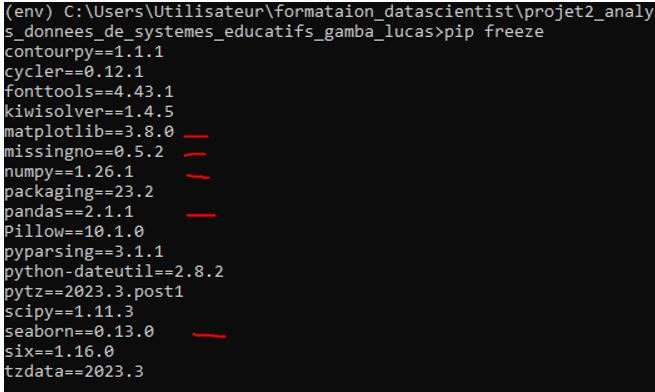

In [204]:
# on importe les packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as mnso

#### <span style='font-family:sans-serif'>Section 1.2 : téléchargement<a class="anchor" id="section_1_2"></a>

##### <span style='font-family:sans-serif'>Section 1.2.1 : les CSV<a class="anchor" id="section_1_2_1"></a>

<span style='font-family:sans-serif'>L'ensembles des données relatives aux systèmes éducatifs mondiaux sont disponibles et téléchargeable à l'adresse suivante au format CSV [ICI](https://datacatalog.worldbank.org/search/dataset/0038480).
Le lien de téléchargement contient 5 fichiers.

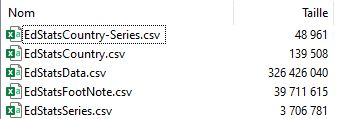

<span style='font-family:sans-serif'>3 de ces fichiers nous intéressent dans le cadre de l'étude : 
- EdStatsCountry.csv, contenant des informations sur les pays recensés par la Banque Mondiale;
- EdStatsSeries.csv, contenant les définitions des indicateurs mesurés pour chaque pays;
- EdStatsData.csv, contenant les mesures des indicateurs pour chaque pays.

##### <span style='font-family:sans-serif'>Section 1.2.2 : les variables<a class="anchor" id="section_1_2_2"></a>

In [205]:
# stockages des tableaux de données dans des dataframes

# tableau des valeurs indicateurs pour tous les pays
data=pd.read_csv('EdStatsData.csv')

# tableau des données pays
country=pd.read_csv('EdStatsCountry.csv')

# tableau des définitions des indicateurs
series=pd.read_csv('EdStatsSeries.csv')

display("data : ",data.head(),"country : ",country.head(),"series : ",series.head())

'data : '

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'country : '

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


'series : '

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### <span style='font-family:sans-serif'>Section 1.2.3 : structure et dimensions<a class="anchor" id="section_1_2_3"></a>

In [206]:
# dimensions de chaque dataframe
print('Dim data = ',data.shape,' | Dim country = ',country.shape,' | Dim series = ',series.shape)

Dim data =  (886930, 70)  | Dim country =  (241, 32)  | Dim series =  (3665, 21)


<span style='font-family:sans-serif'>Au vue du volume de données à analyser, plusieurs filtres seront nécessaires avant de procéder à l'analyse.

Pour commencer, une partie des pays seront <span style='color:darkblue'>**filtrés sur leur niveau de ressource (colonne "Income Group")**</span> à partir du dataframe country. Nous garderons les pays à haut et moyen niveau de richesse qui sont davantage suceptible d'accueillir une clientèle adaptée aux services proposés par academy (car leur population est associé à un un meilleur pouvoir d'achat et un bon accès à l'éducation).

Par la suite, plusieurs filtres seront appliqués sur le dataframe des indicateurs (series). L'objectif sera de sélectionner au <span style='color:darkblue'>**maximum une dizaine d'indicateurs pertinents pour l'étude**</span> :
- une partie des indicateurs sera éliminée via un filtre de la <span style='color:darkblue'>**colonne "Topic"**</span>, regroupant les indicateurs par thèmes (par exemple, les indicateurs concernant l'école primaire seront éliminés en filtrant "primary");
- une seconde partie des indicateurs sera éliminée par analyse de leur définition <span style='color:darkblue'>**(colonnes "Indicator Name" et "Long description")**</span> dans chaque thème. Une fonction spécifique utilisant le package re sera écrite afin de simplifier les définitions répétitives et faciliter leur lecture.

Enfin, la <span style='color:darkblue'>**méthode merge**</span> de la librairie pandas permettra de réduire le volume du dataframe "data" en le focalisant sur les pays et indicateurs retenus après les filtrages des dataframes "country" et "series". Un dernier filtre sur les lignes ayant un faible taux de remplissage sur <span style='color:darkblue'>**une période choisie (entre les années 2000 et 2020 pour garder des valeurs assez récente)**</span> réduira encore la dimension finale avant l'analyse.

Ainsi, le développement d'une fonction spécifique permettra de ne garder que la <span style='color:darkblue'>**valeur la plus récente pour chaque indicateur**</span> et d'obtenir un dataframe complet pour l'analyse dans le [Chapter 2](#chapter2).


#### <span style='font-family:sans-serif'>Chapitre 2 : filtrage<a class="anchor" id="chapter2"></a>

#### <span style='font-family:sans-serif'>Section 2.1 : pays<a class="anchor" id="section_2_1"></a>

##### <span style='font-family:sans-serif'>Section 2.1.1 : derniers rescensements<a class="anchor" id="section_2_1_1"></a>

<span style='font-family:sans-serif'>Avant de réduire le nombre de pays, le dénombrement des dernières années de rescensement est pertinent à réaliser dès maintenant pour avoir une première idée des années les plus fiables et intéressantes à garder plutard dans le cadre de l'étude (voir [Section 2.3.1](#section_2_3_1)).

In [207]:
# cette fonction trace un diagramme bar à partir de la série qui lui est renseignée
def plot_bar(Y_axe, titre, y_titre, x_titre, label_step_for_centered, largeur_fenetre=10, deg_rotation_label_x=0):
    """ 
    Y_axe : serie à afficher en bar
    titre : du graphique (str)
    y_titre : titre des ordonnées (str)
    x_titre : titre des abscisses (str)
    label_step_for_centered : décalage vers la gauche de l'étiquette de données au dessus de chaque barre (float)
    largeur_fenetre : valeur de largeur de l'affichage graphique égale 10 par defaut (float ou int)"""   
    
    X_axe=Y_axe.index.tolist()
    plt.figure(figsize=(largeur_fenetre,6))
    plt.bar(X_axe,Y_axe)
    plt.title(titre, fontname='Arial', fontsize=16)
    plt.xlabel(x_titre, fontweight='bold', fontsize=12)
    plt.ylabel(y_titre, fontweight='bold', fontsize=12)
    plt.grid(axis='y')

    X_grad=Y_axe.tolist()

    if type(X_axe[0])!=str: # si ce n'est pas un string on centre l'étiquette sur sa valeur numérique
        for i in range(len(X_grad)):
            plt.text(X_axe[i]-label_step_for_centered, X_grad[i]+1, X_grad[i])
    elif type(X_axe[0])==str: # sinon on centre sur son indice 
        for i in range(len(X_grad)):
            plt.text(i-label_step_for_centered, X_grad[i]+1, X_grad[i])
    
    p=plt.xticks(rotation=deg_rotation_label_x)
    
    plt.show()

In [208]:
# conversion en numeric et remplacement des string par NaN
country['Latest population census']=pd.to_numeric(country['Latest population census'],errors='coerce')

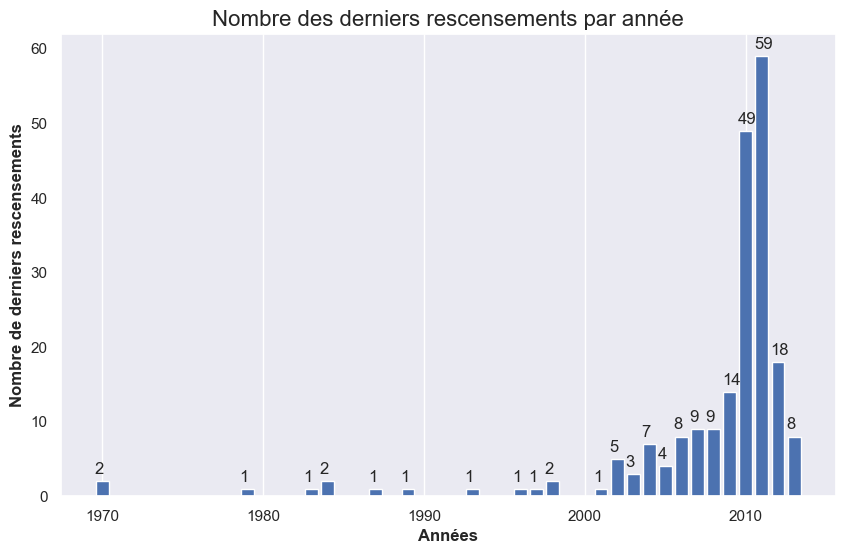

In [209]:
# comptage des derniers rescensements par année
Y_axe=country.groupby('Latest population census')['Latest population census'].count()
titre="Nombre des derniers rescensements par année"
y_titre="Nombre de derniers rescensements"
x_titre="Années"
label_step_for_centered=0.5
plot_bar(Y_axe, titre, y_titre, x_titre, label_step_for_centered)

<span style='font-family:sans-serif'>On peut voir que d'une manière générale la majorité des pays ont été dernièrement rescensés entre les années 2000 et 2015 environ. Cette information servira à filtrer une première fois les années dans le dataframe final avant analyse.

##### <span style='font-family:sans-serif'>Section 2.1.2 :  niveaux de richesses<a class="anchor" id="section_2_1_2"></a>

<span style='font-family:sans-serif'>Dans une moindre mesure, il semble pertinent retirer les pays à faible niveau de richesse.

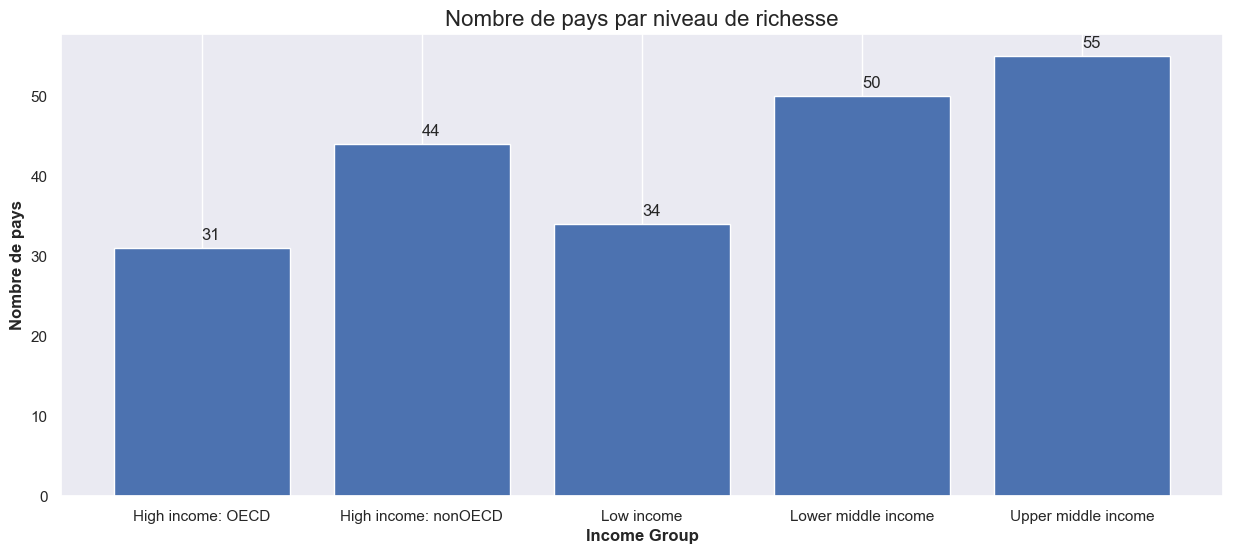

In [210]:
# dénombrement des pays par niveau de richesse (colonne 'Income Group')
Inc_gp_nbr=country.groupby('Income Group')['Income Group'].count()

Y_axe=Inc_gp_nbr
titre="Nombre de pays par niveau de richesse"
y_titre="Nombre de pays"
x_titre="Income Group"
label_step_for_centered=0
plot_bar(Y_axe, titre, y_titre, x_titre, label_step_for_centered, largeur_fenetre=15)

<span style='font-family:sans-serif'>On peut voir que l'on retirera 34 pays en filtrant ceux ayant un faible revenu.

In [211]:
# filtre des revenus bas et moyens

mask=(country['Income Group'].str.contains('Low income'))==True

country_filtered=country.loc[~mask,:]
display(f'{country.shape[0]-country_filtered.shape[0]} pays ont été retiré en filtrant sur Income Group' )

'34 pays ont été retiré en filtrant sur Income Group'

#### <span style='font-family:sans-serif'>Section 2.2 : indicateurs<a class="anchor" id="section_2_2"></a>

In [212]:
# Liste les grand thèmes indicateurs
series.groupby('Topic')['Topic'].count().index

Index(['Attainment', 'Background', 'EMIS', 'Early Child Development (SABER)',
       'Early Childhood Education',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity', 'Education Equality',
       'Education Management Information Systems (SABER)',
       'Engaging the Private Sector (SABER)', 'Expenditures',
       'Health: Mortality', 'Health: Population: Dynamics',
       'Health: Population: Structure', 'Health: Risk factors',
       'Infrastructure: Communications', 'Laber', 'Learning Outcomes',
       'Literacy', 'Population', 'Post-Secondary/Non-Tertiary', 'Pre-Primary',
       'Primary', 'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'School Health and School Feeding 

<span style='font-family:sans-serif'>Par définitions les thèmes suivants seront retirés de l'étude : 
'Early Childhood Education' 'Early Child Development (SABER)' 'Engaging the Private Sector (SABER)' 'Health: Mortality' 'Health: Population: Dynamics' 'Health: Risk factors' 'Pre-Primary' 'Primary' 'School Health and School Feeding (SABER)' 'Social Protection & Labor: Labor force structure' 'Social Protection & Labor: Unemployment' 'Workforce Development (SABER)' 'Learning Outcomes'.

En effet, ces grand thèmes d'indicateurs ne représentent à priori pas les structures secondaires et universitaires.

Ci-dessous, le dataframe nommé series_filtre_topic stock le dataframe des indicateurs sans les grand thèmes mentionnés ci-dessus :

In [213]:
# liste des topics à enlever de l'étude
list_filtre_topic=['Learning Outcomes','Early Childhood Education', 'Early Child Development (SABER)', 'Engaging the Private Sector (SABER)', 'Health: Mortality', 'Health: Population: Dynamics' , 'Health: Risk factors' ,'Pre-Primary' ,'Primary', 'School Health and School Feeding (SABER)', 'Social Protection & Labor: Labor force structure', 'Social Protection & Labor: Unemployment' ,'Workforce Development (SABER)']

# création d'un nouveau dataframe sans ces topics
series_filtre_topic=series[~series['Topic'].isin(list_filtre_topic)]

In [214]:
# on filtre aussi par mot clés les indicateurs qui contiennent "primary" (dans colonne Indicator name et Long definition)
mask_1=series_filtre_topic['Indicator Name'].str.contains('primary')
mask_2=series_filtre_topic['Long definition'].str.contains('primary')
series_filtre_topic=series_filtre_topic.loc[(~mask_1) & (~mask_2),:]

In [215]:
# Compte le nombre d'indicateurs par thème après le filtre appliqué ci-dessus et tri les résultats par ordre décroissant
gp_by_topic=series_filtre_topic.groupby('Topic')['Topic'].count().sort_values(ascending=False)
display(gp_by_topic, f"En filtrant les grand thème et sur le mot-clés 'primary' {round(((series.shape[0]-series_filtre_topic.shape[0])/series.shape[0])*100,1)}% des indicateurs ont été écarté de l'étude.")

Topic
Attainment                                                                                      540
Secondary                                                                                       230
Population                                                                                      201
Education Equality                                                                              172
Tertiary                                                                                        150
Teachers                                                                                         98
Literacy                                                                                         32
Teachers (SABER)                                                                                 29
School Autonomy and Accountability (SABER)                                                       29
Education Management Information Systems (SABER)                                              

"En filtrant les grand thème et sur le mot-clés 'primary' 56.2% des indicateurs ont été écarté de l'étude."

<Axes: title={'center': "Nombre d'indicateurs par thème"}, ylabel='Topic'>

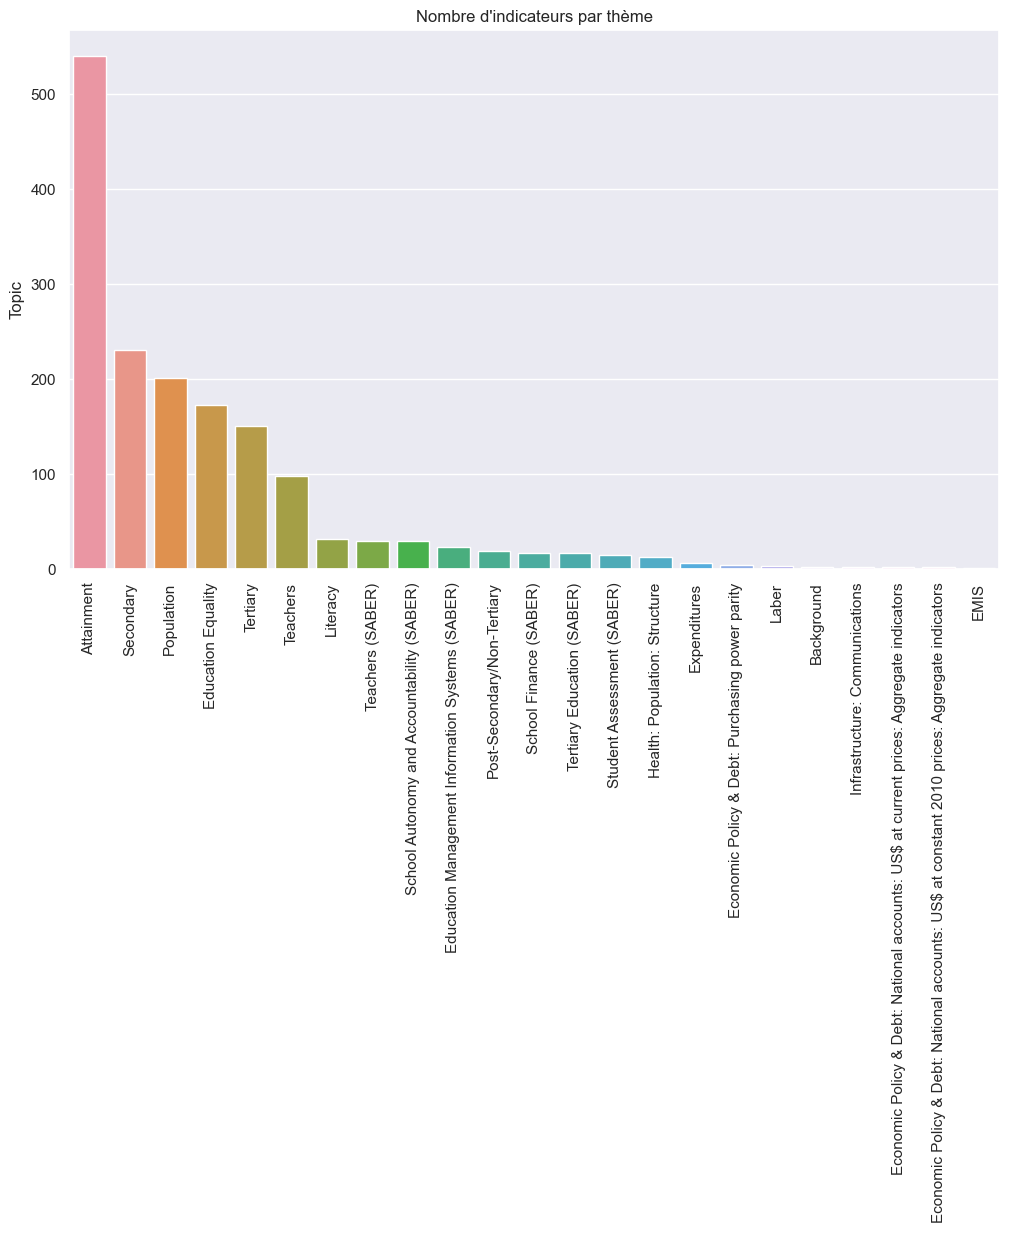

In [216]:
plt.figure()
lab=plt.xticks(rotation=90)
plt.title("Nombre d'indicateurs par thème")
sb.barplot(x=gp_by_topic.index.tolist(),y=gp_by_topic)

<span style='font-family:sans-serif'>Le résultat révèle 3 regroupements : 
- un groupe de thèmes contenant chacun entre 1 et 10 indicateurs,
- un groupe entre 10 et 100,
- un dernier à plus de 100.

L'idée est de se concentrer en priorité sur le troisième groupe afin d'éliminer un maximum d'indicateurs.

Ci-dessous, une fonction spécifique utilisant le module **re** permet de généraliser les définitions d'indicateurs similaires. En effet, de nombreuses lignes représentent les mêmes indicateurs mais pour des années ou groupes d'âges différents. Ainsi la fonction remplace tout chiffres ou signes '+' ou '-' par 'xx' puis groupe les définitions égales.
Cela simplifiera la lecture dans les thèmes à grande population.

In [217]:
# import du module re
import re

In [218]:
# fonction pour simplifier les définitions d'indicateurs
# l'export excel permettra de parcourir le résultat de la fonction
def group_indicateur_par_desc_similaire(topic, to_export_xlsx = True):
    """ group_indicateur_par_desc_similaire regroupe les indicateurs par définition (colonne 'Long definition') similaire
        group_indicateur_par_desc_similaire procède par par thème d'indicateur qu'il faut lui renseigner en argument 
        group_indicateur_par_desc_similaire remplace tout caractère numériques ou '+' ou '-' par 'xx'
        renvoie un fichier excel contenant en colonne 1 pour chaque description d'indicateur la liste des index associés dans le dataframe d'origine
        en colonne 2 le description générique de l'indicateur
        en colonne 3 la liste pour chaque description des éléments associés remplacés par 'xx' dans la description d'origine
        
        cette fonction permet de synthétiser et regrouper les descriptions des indicateurs par thème afin de simplifier leur analyse pour les choix de l'étude """
    
    # ____________Création des 3 listes permettant de généraliser les descriptions d'indicateur______________________
    
    # reprend le dernier dataframe filtré en isolant 1 topic 
    df=series_filtre_topic.loc[series_filtre_topic['Topic']==topic,'Long definition']

    list_index=df.index.tolist() #liste les index du df
    df_list=df.tolist() # liste les éléments du df
    list_info=[] # liste les éléments remplacé dans le description indicateur d'origine
    df_index=[] # liste les index associé de l'indicateur générisé dans le dataframe d'origine

    rg=len(df_list) # = qté d'indicateurs dans le thème renseigné dans le dataframe d'origine

    for i in range(rg): # parcours chaque indicateur

        string_df=df_list[i] # stock la description de l'indicateur
        df_list[i]=re.sub(r'[\d+-]+',r'xx',string_df) # substitu les chiffres, + et - par xx
        list_info.append(re.findall(r'[\d+-]+',string_df)) # rajoute dans list_info l'élément qui a été substitué
        df_index.append(list_index[i]) # rajoute dans df_index l'index de l'indicateur générisé

    #______________Elimination des doublons générés dans les liste par la généralisation des définitions___________
    
    # les 3 liste finales à remplir
    unique_Ind_Desc = [] # contient des descriptions génériques uniques
    unique_Ind_Desc_index = [] # liste des index associés à chaque description
    unique_Ind_Desc_info = [] # liste des éléments substitués par 'xx' dans chaque description
    i=0 #itération sur les liste longues (d'origine)
    count=0 # itération sur les liste courtes (originie moins le doublons dues à la généralisation des descriptions)

    for Ind_Desc in df_list : # on parcours toute la liste d'origine
        if Ind_Desc not in unique_Ind_Desc : # si la description n'a pas été lu alors on la stock elle et ses index et substitu

            unique_Ind_Desc.append(Ind_Desc)

            #last_id_index=unique_Ind_Desc_index.index(max(unique_Ind_Desc_index))
            #last_id_info=unique_Ind_Desc_info.index(max(unique_Ind_Desc_info))
            unique_Ind_Desc_index.append([])
            unique_Ind_Desc_info.append([])

            unique_Ind_Desc_index[count].append(list_index[i])
            unique_Ind_Desc_info[count].append(list_info[i])

            count+=1

        elif Ind_Desc in unique_Ind_Desc: # si on l'a déjà lu alors on stock ses index et substitus au même indice que sa première lecture

            id_ind=unique_Ind_Desc.index(Ind_Desc)

            unique_Ind_Desc_index[id_ind].append(list_index[i])
            unique_Ind_Desc_info[id_ind].append(list_info[i])

        i+=1

    # _____________Création du dataframe finale synthétique par description d'indicateur____________________
    global df_synth_excel
    d={'index': unique_Ind_Desc_index, 'indR_synth': unique_Ind_Desc, 'indR_particularity': unique_Ind_Desc_info}
    
    df_synth_excel=pd.DataFrame(data=d, index=range(len(unique_Ind_Desc)))
        
        
    #_____________Exporte le dataframe au format Excel si to_export_xlsx = True______________________________________________________
    if to_export_xlsx==True:
        # determining the name of the file
        file_name = 'Synthese_theme_'+topic+'.xlsx'

        # saving the excel
        df_synth_excel.to_excel(file_name)
    
    return(df_synth_excel)

In [219]:
# exporte au format excel les définition d'indicateurs pour les 5 Topic les plus peuplés
List_to_reduces=['Attainment','Secondary','Population','Education Equality','Tertiary']
L=[]

for Topic in List_to_reduces:
    dim_topic_1=series_filtre_topic.loc[series_filtre_topic['Topic']==Topic,:].shape[0]
    dim_topic_2=group_indicateur_par_desc_similaire(Topic).shape[0]
    L.append(round(((dim_topic_1-dim_topic_2)/dim_topic_1)*100,2))

In [220]:
L=pd.Series(L,index=List_to_reduces)

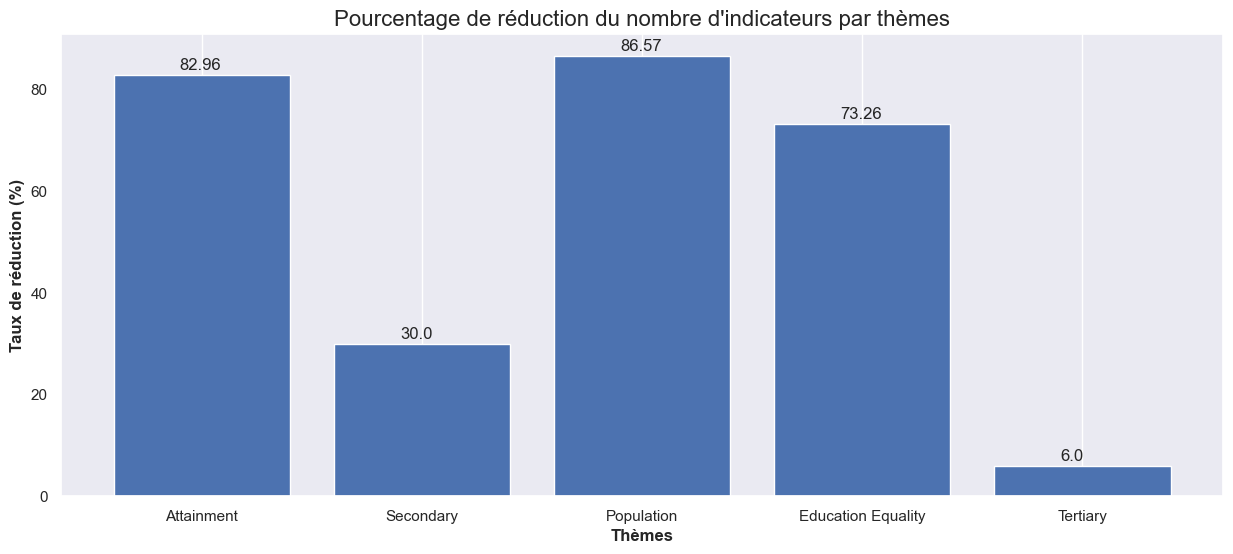

In [221]:
Y_axe=L
titre="Pourcentage de réduction du nombre d'indicateurs par thèmes"
y_titre="Taux de réduction (%)"
x_titre="Thèmes"
label_step_for_centered=0.1
plot_bar(Y_axe, titre, y_titre, x_titre, label_step_for_centered, largeur_fenetre=15)

<span style='font-family:sans-serif'>L'analyse des fichiers Excel en local et des thèmes des groupes 1 et 2 ayant peu d'indicateurs permettent de dresser les deux listes suivantes mixant des codes et des index.

In [222]:
# la liste des indicateurs finaux
list_with_series_code=['NY.GDP.MKTP.KD','SP.POP.TOTL','IT.CMP.PCMP.P2','IT.NET.USER.P2','NY.GDP.MKTP.PP.CD','UIS.XGDP.FSgov.FDinstadm.FFd']
list_with_df_filtre_1_index=[2332,3533,2293,2825]

# complète list_with_series_code avec les code indicateur ayant les index contenus dans list_with_df_filtre_1_index
for ind in list_with_df_filtre_1_index:
    list_with_series_code.append(series_filtre_topic['Series Code'][ind])

mask=series_filtre_topic['Series Code'].apply(lambda i: i in list_with_series_code)

tab_indicateur=series_filtre_topic.loc[mask,['Series Code','Indicator Name']]
display(tab_indicateur)

,Series Code,Indicator Name
610,IT.CMP.PCMP.P2,Personal computers (per 100 people)
611,IT.NET.USER.P2,Internet users (per 100 people)
1659,NY.GDP.MKTP.KD,GDP (constant 2010 US$)
1660,NY.GDP.MKTP.PP.CD,"GDP, PPP (current international $)"
2293,SE.SEC.DURS.UP,Theoretical duration of upper secondary educat...
2332,SE.TER.ENRL,"Enrolment in tertiary education, all programme..."
2590,SP.POP.TOTL,"Population, total"
2825,UIS.E.3,"Enrolment in upper secondary education, both s..."
3533,UIS.TE_100000.56,"Enrolment in tertiary education per 100,000 in..."
3590,UIS.XGDP.FSgov.FDinstadm.FFd,Government expenditure in educational institut...


<span style='font-family:sans-serif'>On ramrque que tous les codes sont en majuscule sauf celui d'index 3590. Afin d'éviter les erreurs pour la construction du fichier final, tout est converti en majuscule ci-dessous :

In [223]:
tab_indicateur['Series Code']=tab_indicateur['Series Code'].str.upper()

#### <span style='font-family:sans-serif'>Section 2.3 : années<a class="anchor" id="section_2_3"></a>

##### <span style='font-family:sans-serif'>Section 2.3.1 : restriction<a class="anchor" id="section_2_3_1"></a>

<span style='font-family:sans-serif'>Dans un premier temps, on restreint le dataframe initial global aux pays aux et indicateurs retenus

In [224]:
#on stock dans des liste les indicateurs et pays
list_country=list(country_filtered['Country Code'])
list_ind=list(tab_indicateur['Series Code'])

In [225]:
#on filtre le data avec les pays et indicateurs retenus
mask_1=(data['Country Code'].isin(list_country))
mask_2=(data['Indicator Code'].isin(list_ind))
# dataframe final avant de filtrer par année et par tax de remplissage
data_final_all_years=data.loc[mask_1 & mask_2,:]

<span style='font-family:sans-serif'>Puis on retire une partie des colonnes des années.

In [226]:
# la libraire missingno donnera une visibilité sur le remplissage de ce nouveau dataframe
import missingno as msno

<Axes: >

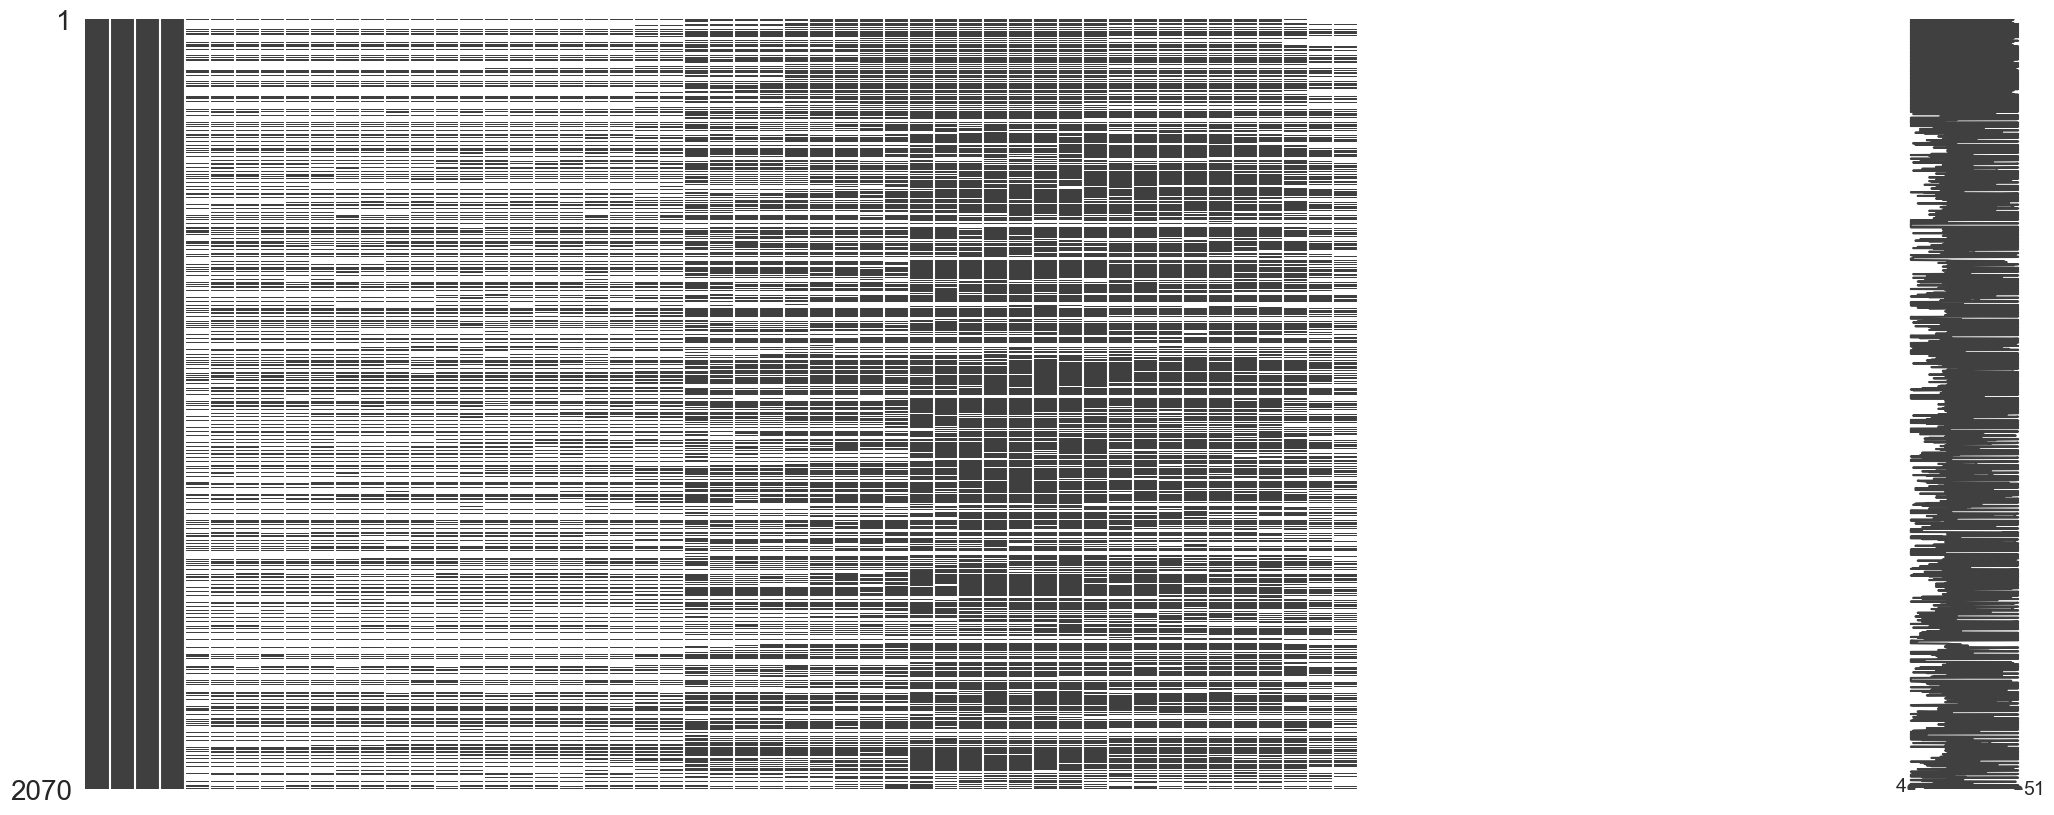

In [227]:
msno.matrix(data_final_all_years)

<span style='font-family:sans-serif'>La matrice valide l'hypothèse vu au [Section 2.1.1 : derniers rescensements](#section_2_1_1). Le remplissage est meilleur à partir des années 2000 environ ce qui correspond à peu près au milieu de la matrice en colonne.

A parir d'ici les opérations seront faites sur les données comprises entre 2000 et 2020 pour augmenter un maximum le remplissage des colonnes et éliminer les valeurs en prévision.

In [228]:
#liste de toutes les années
list_annee_str=data_final_all_years.loc[:,'1970':'2100'].columns.tolist()

#conversion de ses éléments en valeurs numériques
list_annee_int=list(map(int,list_annee_str))

# retire toutes les années inférieures à 2000 et supérieures à 2020
i=0
while i<len(list_annee_int):
        if list_annee_int[i]<2000 or list_annee_int[i]>2020:
            del(list_annee_int[i])
        else:
            i+=1

print("La liste des années retenues dans un second temps :",list_annee_int)

La liste des années retenues dans un second temps : [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020]


In [229]:
# reconverti en chaîne de caractère les éléments de la liste des années
list_annee_str_reduced=list(map(str,list_annee_int))

# ajout des noms des colonnes indicateur et pays
list_annee_str_reduced=['Country Name','Country Code','Indicator Name','Indicator Code']+list_annee_str_reduced

print("Liste de toutes les colonnes à garder :",list_annee_str_reduced)

Liste de toutes les colonnes à garder : ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020']


In [230]:
# filtre toutes les années sauf celles comprises entre 2000 et 2020
data_final_centred_years=data_final_all_years.loc[:,list_annee_str_reduced]
display("Dataframe centré sur les années entre 2000 et 2020 :",data_final_centred_years.head())

'Dataframe centré sur les années entre 2000 et 2020 :'

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
1201,Arab World,ARB,"Enrolment in tertiary education per 100,000 in...",UIS.TE_100000.56,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,5.089854e+06,5.400639e+06,5.798696e+06,5.955514e+06,6.465715e+06,6.899156e+06,...,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9966484.0,NaN,NaN,NaN,NaN
1214,Arab World,ARB,"Enrolment in upper secondary education, both s...",UIS.E.3,8.554936e+06,9.096402e+06,9.393456e+06,1.018652e+07,1.074748e+07,1.073953e+07,...,1.017877e+07,1.064478e+07,1.162018e+07,1.202761e+07,1.202161e+07,11995984.0,NaN,NaN,NaN,NaN
1242,Arab World,ARB,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,9.269754e+11,9.480829e+11,9.650682e+11,1.015380e+12,1.108014e+12,1.176100e+12,...,1.440164e+12,1.515629e+12,1.566083e+12,1.663124e+12,1.718874e+12,NaN,NaN,NaN,NaN,NaN
1249,Arab World,ARB,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,2.523213e+12,2.644195e+12,2.721095e+12,2.871734e+12,3.231080e+12,3.533460e+12,...,4.711255e+12,5.022945e+12,5.265230e+12,5.696577e+12,5.935614e+12,NaN,NaN,NaN,NaN,NaN


##### <span style='font-family:sans-serif'>Section 2.3.2 : lignes vides<a class="anchor" id="section_2_3_2"></a>

<span style='font-family:sans-serif'>L'objectif de cette section est d'obtenir une dataframe sans ligne vide.

In [231]:
# calcul le taux de remplissage par indicateur (par ligne) dans une nouvelle colonne nommé taux_NaN
# calcul du nombre de valeurs NaN
annees=data_final_centred_years.loc[:,'2000':'2020'] # focus sur les colonne des années
data_final_centred_years['taux_NaN']=round(100-((annees.isna().sum(axis=1,skipna=True)/annees.shape[1])*100),2)
data_final_centred_years.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,taux_NaN
1201,Arab World,ARB,"Enrolment in tertiary education per 100,000 in...",UIS.TE_100000.56,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,5.089854e+06,5.400639e+06,5.798696e+06,5.955514e+06,6.465715e+06,6.899156e+06,...,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9966484.0,NaN,NaN,NaN,NaN,78.95
1214,Arab World,ARB,"Enrolment in upper secondary education, both s...",UIS.E.3,8.554936e+06,9.096402e+06,9.393456e+06,1.018652e+07,1.074748e+07,1.073953e+07,...,1.064478e+07,1.162018e+07,1.202761e+07,1.202161e+07,11995984.0,NaN,NaN,NaN,NaN,78.95
1242,Arab World,ARB,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,9.269754e+11,9.480829e+11,9.650682e+11,1.015380e+12,1.108014e+12,1.176100e+12,...,1.515629e+12,1.566083e+12,1.663124e+12,1.718874e+12,NaN,NaN,NaN,NaN,NaN,73.68
1249,Arab World,ARB,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,2.523213e+12,2.644195e+12,2.721095e+12,2.871734e+12,3.231080e+12,3.533460e+12,...,5.022945e+12,5.265230e+12,5.696577e+12,5.935614e+12,NaN,NaN,NaN,NaN,NaN,73.68


<span style='font-family:sans-serif'>Les opérations ci-dessous vont supprimer tous les pays ayant au moins une ligne vide. L'objectif est d'obtenir un dataframe avec l'ensemble des indicateurs valorisé pour tous les pays.

In [232]:
# stock dans df1 les lignes d'indicateurs nuls
df1=data_final_centred_years.loc[data_final_centred_years['taux_NaN']==0,['Country Name','Indicator Name','taux_NaN']]
display("Les lignes d'indicateurs vides :",df1)

# stock dans une liste les pays associés à ces lignes vides
list_country_with_NaN=df1.groupby('Country Name')['Indicator Name'].count().index.tolist()
display("Liste des pays ayant une ou plusieurs lignes d'indicateurs vides :",list_country_with_NaN)

"Les lignes d'indicateurs vides :"

,Country Name,Indicator Name,taux_NaN
1201,Arab World,"Enrolment in tertiary education per 100,000 in...",0.0
1254,Arab World,Government expenditure in educational institut...,0.0
2987,Arab World,Theoretical duration of upper secondary educat...,0.0
4866,East Asia & Pacific,"Enrolment in tertiary education per 100,000 in...",0.0
4919,East Asia & Pacific,Government expenditure in educational institut...,0.0
...,...,...,...
873519,West Bank and Gaza,"GDP, PPP (current international $)",0.0
873524,West Bank and Gaza,Government expenditure in educational institut...,0.0
877189,"Yemen, Rep.",Government expenditure in educational institut...,0.0
880801,Zambia,"Enrolment in tertiary education per 100,000 in...",0.0


"Liste des pays ayant une ou plusieurs lignes d'indicateurs vides :"

['Algeria',
 'American Samoa',
 'Andorra',
 'Arab World',
 'Azerbaijan',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Cayman Islands',
 'Channel Islands',
 'China',
 'Cuba',
 'Curacao',
 'Dominica',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Egypt, Arab Rep.',
 'Equatorial Guinea',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Faroe Islands',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Iraq',
 'Isle of Man',
 'Jordan',
 'Kazakhstan',
 'Kiribati',
 'Kosovo',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Libya',
 'Liechtenstein',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Micronesia, Fed. Sts.',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'Monaco',
 

<span style='font-family:sans-serif'>On supprime ces pays du dataframe.

In [233]:
# supprime ces pays du dataframe
data_final_centred_years=data_final_centred_years.loc[~data_final_centred_years['Country Name'].isin(list_country_with_NaN),:]
display(data_final_centred_years.head())

# calcul le taux de remplissage minimum pour vérifier qu'il n'y a plus de lignes vides (renverrai 0)
display(f"La ligne la moins renseignée et remplie à {data_final_centred_years['taux_NaN'].min()}%")

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,taux_NaN
96491,Albania,ALB,"Enrolment in tertiary education per 100,000 in...",UIS.TE_100000.56,1.285248e+03,1.307868e+03,1.349936e+03,1.398761e+03,1.708058e+03,2.052351e+03,...,4.215401e+03,4.673477e+03,5.583395e+03,6.001115e+03,6.015173e+03,NaN,NaN,NaN,NaN,78.95
96494,Albania,ALB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,4.012500e+04,4.085900e+04,4.216000e+04,4.360000e+04,5.301400e+04,6.325700e+04,...,1.223260e+05,1.348770e+05,1.608390e+05,1.730290e+05,1.738190e+05,1.605270e+05,NaN,NaN,NaN,84.21
96504,Albania,ALB,"Enrolment in upper secondary education, both s...",UIS.E.3,1.049460e+05,1.109960e+05,1.225550e+05,1.329320e+05,1.424490e+05,1.560150e+05,...,1.406570e+05,1.501340e+05,1.521820e+05,1.544250e+05,1.519370e+05,NaN,NaN,NaN,NaN,78.95
96532,Albania,ALB,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,7.221967e+09,7.795415e+09,8.125268e+09,8.594380e+09,9.085081e+09,9.604822e+09,...,1.192695e+10,1.223111e+10,1.240479e+10,1.252893e+10,1.275124e+10,1.303516e+10,1.347444e+10,NaN,NaN,89.47
96539,Albania,ALB,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,1.243808e+10,1.365949e+10,1.450656e+10,1.554698e+10,1.672360e+10,1.789688e+10,...,2.810079e+10,2.965536e+10,3.053034e+10,3.063155e+10,3.274079e+10,3.298144e+10,3.412638e+10,NaN,NaN,89.47


'La ligne la moins renseignée et remplie à 5.26%'

##### <span style='font-family:sans-serif'>Section 2.3.3 : valeurs récentes<a class="anchor" id="section_2_3_3"></a>

<span style='font-family:sans-serif'>Cette section consiste à garder une seule colonne d'indicateurs. Chaque ligne sera valorisée par la valeur la plus récente (dernière valeur non nulle) de l'indicateur associé (du couple pays-indicateur associé pour être exacte).

<span style='font-family:sans-serif'>Tout d'abord on supprime la colonne taux_NaN du dataframe, qui ne sert plus pour la suite.

In [234]:
data_final_centred_years=data_final_centred_years.drop('taux_NaN', axis=1)

<span style='font-family:sans-serif'>Puis on converti tous les champs NaN en valeurs nulles.

In [235]:
# remplace toutes les valeurs NaN par 0
data_final_centred_years=data_final_centred_years.fillna(0)

In [236]:
# on vérifie qu'on ait bien des valeurs numérique dans les années
data_final_centred_years.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2020              float64
dtype: object

<span style='font-family:sans-serif'>La fonction ci-dessous renvoie une liste des dernières valeurs non nulles pour chaque ligne. Pour cela, elle parcours chaque ligne de droite à gauche et stock la première valeurs différente de zéro.

In [237]:
# prend le dataframe en argument
def last_indicator(datafr):
    
    
    # délimiteurs de la boucle 
    fin_df=datafr.shape[0] #on s'arrête à la dernière ligne du df
    start_col=datafr.shape[1]-1 # on commence analyse de chaque ligne dès la dernière colonne
    
    # on initialise la liste qui récupère le dernier indicateur non nul de chaque ligne
    global L_val
    L_val=[]
    
    # on parcours chaque ligne de droite à gauche depuis la dernière colonne
    for i in range(fin_df):
        
        j=start_col
        
        while datafr.iloc[i,j]==0:
            j-=1
                
        L_val.append(datafr.iloc[i,j])
        
    return(L_val)

In [238]:
# crée un datframe isolant les premières colonnes string de gauche
dataframe_str=data_final_centred_years.loc[:,'Country Name':'Indicator Code']

# ajoute une colonne égale à la liste des indicateurs les plus récents
ind_recent=last_indicator(data_final_centred_years) #les indicateur récents
dataframe_str['Indicateur']=ind_recent

<span style='font-family:sans-serif'>Par anticipation sur le travail d'analyse au prochain chapitre, il est pertinent d'ajouter la région de chaque pays dans les données.

In [239]:
# isole les colonnes country code et region
country_regions=country.loc[:,['Country Code','Region']]

# ajoute les régions au dataframe
dataframe_str=pd.merge(country_regions,dataframe_str,on='Country Code',how='right')

<span style='font-family:sans-serif'>La colonne des régions sera placée en première.

In [240]:
# liste des colonnes du dataframe
list(dataframe_str.columns)

['Country Code',
 'Region',
 'Country Name',
 'Indicator Name',
 'Indicator Code',
 'Indicateur']

In [241]:
# réarrange l'odre des premières colonnes pour avoir la region en première
dataframe_str=dataframe_str[['Region',
 'Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 'Indicateur']]
display("Dataframe contenant les données pour l'analyse :",dataframe_str.head())

"Dataframe contenant les données pour l'analyse :"

,Region,Country Name,Country Code,Indicator Name,Indicator Code,Indicateur
0,Europe & Central Asia,Albania,ALB,"Enrolment in tertiary education per 100,000 in...",UIS.TE_100000.56,6.015173e+03
1,Europe & Central Asia,Albania,ALB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.605270e+05
2,Europe & Central Asia,Albania,ALB,"Enrolment in upper secondary education, both s...",UIS.E.3,1.519370e+05
3,Europe & Central Asia,Albania,ALB,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1.347444e+10
4,Europe & Central Asia,Albania,ALB,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,3.412638e+10


In [242]:
#renome le dataframe :
data_analyse=dataframe_str

##### <span style='font-family:sans-serif'>Section 2.3.4 : mise en forme<a class="anchor" id="section_2_3_4"></a>

<span style='font-family:sans-serif'>Dans cette section, le dataframe est mis en forme pour l'analyse (disposition des lignes, noms des variables...).

In [243]:
# supprime les codes names pour une meilleure visibilité
tab_data_analyse=data_analyse.drop(['Country Code','Indicator Code'],axis=1)
tab_data_analyse.head()

,Region,Country Name,Indicator Name,Indicateur
0,Europe & Central Asia,Albania,"Enrolment in tertiary education per 100,000 in...",6.015173e+03
1,Europe & Central Asia,Albania,"Enrolment in tertiary education, all programme...",1.605270e+05
2,Europe & Central Asia,Albania,"Enrolment in upper secondary education, both s...",1.519370e+05
3,Europe & Central Asia,Albania,GDP at market prices (constant 2005 US$),1.347444e+10
4,Europe & Central Asia,Albania,"GDP, PPP (current international $)",3.412638e+10


In [244]:
# met les indicateurs en colonne et les région et pays en index
tab_data_analyse=data_analyse.pivot_table(index=['Region','Country Name'],columns='Indicator Name',values='Indicateur')
display(tab_data_analyse)

Indicator Name                             Enrolment in tertiary education per 100,000 inhabitants, both sexes  \
Region              Country Name                                                                                 
East Asia & Pacific Australia                                                    6153.159180                     
                    Brunei Darussalam                                            2705.357422                     
                    Fiji                                                         1547.419189                     
                    Hong Kong SAR, China                                         4218.781250                     
                    Indonesia                                                    2540.057129                     
...                                                                                      ...                     
Sub-Saharan Africa  Sao Tome and Principe                                        1227.251709                     
                    Senegal                                                       710.870483                     
                    Seychelles                                                    501.731537                     
                    South Africa                                                 1938.711670                     
                    Swaziland                                                     644.229614                     

Indicator Name                             Enrolment in tertiary education, all programmes, both sexes (number)  \
Region              Country Name                                                                                  
East Asia & Pacific Australia                                                   1.453521e+06                      
                    Brunei Darussalam                                           1.086600e+04                      
                    Fiji                                                        1.271700e+04                      
                    Hong Kong SAR, China                                        2.986427e+05                      
                    Indonesia                                                   5.107999e+06                      
...                                                                                      ...                      
Sub-Saharan Africa  Sao Tome and Principe                                       2.336000e+03                      
                    Senegal                                                     1.448270e+05                      
                    Seychelles                                                  1.035000e+03                      
                    South Africa                                                1.018543e+06                      
                    Swaziland                                                   8.057000e+03                      

Indicator Name                             Enrolment in upper secondary education, both sexes (number)  \
Region              Country Name                                                                         
East Asia & Pacific Australia                                                      1104162.0             
                    Brunei Darussalam                                                34091.0             
                    Fiji                                                             36267.0             
                    Hong Kong SAR, China                                            225437.0             
                    Indonesia                                                      9902660.0             
...                                                                                      ...             
Sub-Saharan Africa  Sao Tome and Principe                                             7446.0             
                    Senegal                                        

In [245]:
# renomme les variables indicateur pour plus de lisibilité
tab_data_analyse=tab_data_analyse.rename(columns={'Enrolment in tertiary education per 100,000 inhabitants, both sexes':'Inscriptions université (par 100.000 habitants)','Enrolment in tertiary education, all programmes, both sexes (number)':'Inscriptions université (nombre)','Enrolment in upper secondary education, both sexes (number)':'Inscriptions lycée (nombre)','GDP, PPP (current international $)':'PIB PPA ($)','GDP at market prices (constant 2005 US$)':'PIB','Government expenditure in educational institutions as % of GDP (%)':'Dépenses éducation (% PIB)','Internet users (per 100 people)':'Utilisateurs internet (pour 100 habitants)','Personal computers (per 100 people)':'Nombre de PC (pour 100 personnes)','Theoretical duration of upper secondary education (years)':'Nombre années théoriques lycée'})

In [246]:
# on vérifie que tous les pays ont une valeurs pour chaque indicateur
taux_nan=100-(data_analyse.isna().sum(axis=1,skipna=True)/data_analyse.shape[0])*100
display(taux_nan,"taux de remplissage minimum :",taux_nan.min())

0       100.0
1       100.0
2       100.0
3       100.0
4       100.0
        ...  
1205    100.0
1206    100.0
1207    100.0
1208    100.0
1209    100.0
Length: 1210, dtype: float64

'taux de remplissage minimum :'

100.0

In [247]:
# on attribut ce dataframe final au dataframe data_analyse
data_analyse=tab_data_analyse

display(f"Voici le dataframe prêt pour l'analyse et qui compte {data_analyse.shape[0]} pays et {data_analyse.shape[1]} indicateurs sur leur système éducatif :",data_analyse)

"Voici le dataframe prêt pour l'analyse et qui compte 121 pays et 10 indicateurs sur leur système éducatif :"

Indicator Name                             Inscriptions université (par 100.000 habitants)  \
Region              Country Name                                                             
East Asia & Pacific Australia                                                  6153.159180   
                    Brunei Darussalam                                          2705.357422   
                    Fiji                                                       1547.419189   
                    Hong Kong SAR, China                                       4218.781250   
                    Indonesia                                                  2540.057129   
...                                                                                    ...   
Sub-Saharan Africa  Sao Tome and Principe                                      1227.251709   
                    Senegal                                                     710.870483   
                    Seychelles                                                  501.731537   
                    South Africa                                               1938.711670   
                    Swaziland                                                   644.229614   

Indicator Name                             Inscriptions université (nombre)  \
Region              Country Name                                              
East Asia & Pacific Australia                                  1.453521e+06   
                    Brunei Darussalam                          1.086600e+04   
                    Fiji                                       1.271700e+04   
                    Hong Kong SAR, China                       2.986427e+05   
                    Indonesia                                  5.107999e+06   
...                                                                     ...   
Sub-Saharan Africa  Sao Tome and Principe                      2.336000e+03   
                    Senegal                                    1.448270e+05   
                    Seychelles                                 1.035000e+03   
                    South Africa                               1.018543e+06   
                    Swaziland                                  8.057000e+03   

Indicator Name                             Inscriptions lycée (nombre)  \
Region              Country Name                                         
East Asia & Pacific Australia                                1104162.0   
                    Brunei Darussalam                          34091.0   
                    Fiji                                       36267.0   
                    Hong Kong SAR, China                      225437.0   
                    Indonesia                                9902660.0   
...                                                                ...   
Sub-Saharan Africa  Sao Tome and Principe                       7446.0   
                    Senegal                                   130602.0   
                    Seychelles                                  2624.0   
                    South Africa                             2971802.0   
                    Swaziland                                  29250.0   

Indicator Name                                      PIB   PIB PPA ($)  \
Region              Country Name                                        
East Asia & Pacific Australia              1.343181e+12  1.128908e+12   
                    Brunei Darussalam      1.330146e+10  3.282770e+10   
                    Fiji                   3.771168e+09  8.203555e+09   
                    Hong Kong SAR, China   2.698123e+11  4.308915e+11   
                    Indonesia              1.037688e+12  3.037181e+12   
...                                                 ...           ...   
Sub-Saharan Africa  Sao Tome and Principe  2.566618e+08  6.484436e+08   
                    Senegal                1.683335e+10  3.962481e+10   
                    Seychelles             1.322031e+09 

In [248]:
# afin de d'inclure les pays et région en tant que variable dans les analyses il est nécessaire de les repasser en colonne :
df_reorg=data_analyse.reset_index()

### <span style='font-family:sans-serif'>Chapitre 3 : analyse statistique <a class="anchor" id="chapter3"></a>

#### <span style='font-family:sans-serif'>Section 3.1 Réorganisation des variables <a class="anchor" id="section_3_1"></a>

<span style='font-family:sans-serif'>Avec du recul sur les données j'ai jugé que le PIB en tant que tel n'était pas spécifiquement indispensable à l'étude. Selon moi le PIB_PPA sera plus pertinent car il est par définition plus représentatif du pouvoir d'achat d'une population.

De plus, la colonne "Inscriptions université (par 100.000 habitants)" est redondante car nous avons déjà les données sur le nombre d'inscrit et sur le nombre de la population. Ainsi, une colonne égale à la somme des inscriptions au lycée et à l'université sera plus pertinente.

In [249]:
# création de la colonne TAUX_ETUDIANT égale à la somme des inscrits à l'université et au lycée 
# divisé par la population afin de valoriser la "proportion de la clientèle potentielle" pour chaque pays :
df_reorg['TAUX_ETUDIANT']=(df_reorg['Inscriptions université (nombre)']+df_reorg['Inscriptions lycée (nombre)'])/df_reorg['Population, total']

In [250]:
# création d'une colonne égale au PIB PPA par habitant qui donnera une indication sur 
# le pouvoir d'achat moyen de chaque habitant au sein d'une population.
df_reorg['PIB_PPA_HABITANT']=df_reorg['PIB PPA ($)']/df_reorg['Population, total']

In [251]:
# On retire les colonnes PIB et inscription à l'université par 100.000 habitants
df_reorg=df_reorg.loc[:,['Region','Country Name','TAUX_ETUDIANT','PIB_PPA_HABITANT','Dépenses éducation (% PIB)','Utilisateurs internet (pour 100 habitants)','Nombre de PC (pour 100 personnes)','Nombre années théoriques lycée','Population, total']]

In [252]:
# renomme les colonnes pour une meilleure visibilité
df_reorg=df_reorg.rename(columns={'Utilisateurs internet (pour 100 habitants)':'TAUX_INTERNET_USERS','Nombre de PC (pour 100 personnes)':'TAUX_PC', 'Dépenses éducation (% PIB)':'TAUX_DEPENSE','Nombre années théoriques lycée':'NB_ANNEE_LYCEE','Population, total':'POPULATION'})

In [253]:
display(df_reorg.head(), df_reorg.shape)

Indicator Name,Region,Country Name,TAUX_ETUDIANT,PIB_PPA_HABITANT,TAUX_DEPENSE,TAUX_INTERNET_USERS,TAUX_PC,NB_ANNEE_LYCEE,POPULATION
0,East Asia & Pacific,Australia,0.106008,46789.927238,4.18846,88.238658,60.140967,2.0,24127159.0
1,East Asia & Pacific,Brunei Darussalam,0.106232,77570.911947,3.76595,75.000000,8.971902,5.0,423196.0
2,East Asia & Pacific,Fiji,0.054502,9127.637483,3.87738,46.506978,6.079146,3.0,898760.0
3,East Asia & Pacific,"Hong Kong SAR, China",0.071335,58651.025580,3.27649,87.300343,69.394030,3.0,7346700.0
4,East Asia & Pacific,Indonesia,0.057487,11631.563696,3.25284,25.366301,1.980591,3.0,261115456.0


(121, 9)

#### <span style='font-family:sans-serif'>Section 3.2 Analyse des variables <a class="anchor" id="section_3_2"></a>

<span style='font-family:sans-serif'>Les cellules ci-dessous combinent de l'analyse univariée et bivariée.

Dans un premier temps, la cellule ci-dessous calcul l'indice de Gini pour une serie données. Cela permettra de rrendre compte de la répartition des valeurs pour chaque variable.

In [254]:
#calcul l'indice de gini de la variable.
# si inférieur à 0.5 : il n'y a pas énormément de disparité entre les pays
#si supérieur à 0.5 : quelques pays concentres une grande partie des valeurs
def indice_gini(serie_dataframe):
   
    dep = serie_dataframe.values
    n = len(dep)
    lorenz = np.cumsum(np.sort(dep)) / dep.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
    S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
    gini = 2*S
    
    return(gini)

<span style='font-family:sans-serif'>Ci-dessous une fonction permettant de calculer le rapport de corrélation entre deux série de valeurs. 

Cela permettra de comparer statistiquement la moyenne de chaque variable selon la région.

In [255]:

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

<span style='font-family:sans-serif'>Enfin, la fonction suivante trace dans la même fenêtre une boîte à moustache d'une variable donnée, toutes régions confondues, puis une série de boîtes à moustache de cette même variable pour chaque région. On pourra alors visualiser l'influence de la variable **qualitative** "Region" sur chaque variable d'indicateur de type **quantitative**.

In [256]:
#Trace les boîtes à moiustache toutes région confondu pour une variable et pour chaque région.

def boxplot_region_compare_1_variable(variable, dataframe, wd_x, wd_y):
    """
    variable : str de la colonne à traiter
    dataframe : nom complet du dataframe du calcul
    wd_x, wd_y : taille de la fenêtre contenant les graphiques en largeur et en hauteur.
    """
    var=variable
    
    tr=0.5

    serie_df = dataframe.loc[:,variable] # sélection des individus de la tranche ind
    dispersion=[f"variance empirique = {round(serie_df.var(),3)}",
               f"écart-type = {round(serie_df.std(),3)}",
                f"coefficient de variation = {round(serie_df.std()/serie_df.mean(),3)}",
                 f"skewness empirique = {round(serie_df.skew(),3)}", 
                f"kurtosis  empirique = {round(serie_df.kurtosis(),3)}",
                f"indice de gini = {round(indice_gini(serie_df),3)}",
                f"rapport de corrélation Eta² = {round(eta_squared(dataframe['Region'],serie_df),3)}"
                   ]
    g = {
        'valeurs': serie_df,
        'centre_classe': tr,
        'variable': var,
        'description': serie_df.describe(),
        'dispersion': dispersion
    }

    # affichage des boxplots
        # + affichage des valeurs
    param_desc=['mean','25%','50%','75%'] #'min','max'
    p=1

    #plt.figure(figsize=(10,20))

    X = "Region" # qualitative
    Y = variable #['TAUX_ETUDIANT','PIB_PPA_HABITANT','TAUX_DEPENSE','TAUX_INTERNET_USERS','TAUX_PC','NB_ANNEE_LYCEE'] # quantitative

    fig,ax=plt.subplots(1,2,figsize=(wd_x,wd_y), layout="constrained") #figsize=(12,36) pour 6 variables

    c=0

    ax[0].set_title(g["variable"], fontsize=10)
    ax[0].grid()
    ax[0].boxplot([g["valeurs"]],
                showfliers= True, # on ne prend pas en compte les outliers
                widths= 0.7,
               showmeans=True) # largeur graphique des boxplots

    # affiche sur le premier box la valeur de chaque borne
    for k in range(len(param_desc)): # NB : baisse l'etiquette de 5% de l'écart-type pour plus de lisibilité
        ax[0].text(1,g["description"][param_desc[k]]-0.05*g["description"]['std'],round(g["description"][param_desc[k]],2),fontsize='x-small',horizontalalignment='center',verticalalignment='top')

    c=1
    #construit boxplot de la variable par region__________________________

    # recup la colonne de la varaiable
    sous_echantillon = dataframe.copy()

    modalites = sous_echantillon[X].unique()
    groupes = []
    for m in modalites:
        groupes.append(sous_echantillon[sous_echantillon[X]==m][variable])

    # Propriétés graphiques 
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
    ax[1].set_title(variable + " par Region", fontsize=12)
    ax[1].grid()
    ax[1].boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
                vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
    labels = ax[1].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right', fontsize=10)

    dispersion_str=f"dispersion : \n"
    for t in range(len(g["dispersion"])):
        dispersion_str+= f"{g['dispersion'][t]}\n"

    ax[1].text(9,g["description"][param_desc[0]],dispersion_str,fontsize='x-small')
    # affichage des effectifs de chaque classe
    for b in range(1,modalites.shape[0]+1):
        plt.text(b,1,"(n={})".format(groupes[b-1].shape[0]),horizontalalignment='center',verticalalignment='top', fontsize=9)  
    #_____________________________________________________________________

    plt.show()

<span style='font-family:sans-serif'>Compte tenu du temps passé sur le projet et des délais, cette fonction ne sera pas plus optimisé.

<ins>Nota Bene </ins>: *la fonction suivante reproduit les mêmes résultats avec plusieurs variables à la fois. Elle est quasiment une copie de la précédente. Cela est due à l'utilisation de la méthode subplot qui nécessite l'utilisation d'une fonction ax[a,b] avec a,b les coordonnées des graphiques à faire afficher dans la fenêtre. Cette fonction ne prend qu'un seule argument s'il n'y a qu'une ligne de graphique à faire afficher.*

In [257]:
# Même fonction pour traiter plusieurs variable à la fois et les afficher.

def boxplot_region_compare(liste_variable, dataframe,wd_x,wd_y):
    """
    variable : str de la colonne à traiter
    dataframe : nom complet du dataframe du calcul
    wd_x, wd_y : taille de la fenêtre contenant les graphiques en largeur et en hauteur.
    """
        
    list_var=liste_variable #['TAUX_ETUDIANT','PIB_PPA_HABITANT','TAUX_DEPENSE','TAUX_INTERNET_USERS','TAUX_PC','NB_ANNEE_LYCEE']

    groupes = [] # va recevoir les données agrégées à afficher

    tr=0.5

    for var in list_var: # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
        serie_df = dataframe.loc[:,var] # sélection des individus de la tranche ind
        dispersion=[f"variance empirique = {round(serie_df.var(),3)}",
                   f"écart-type = {round(serie_df.std(),3)}",
                    f"coefficient de variation = {round(serie_df.std()/serie_df.mean(),3)}",
                     f"skewness empirique = {round(serie_df.skew(),3)}", 
                    f"kurtosis  empirique = {round(serie_df.kurtosis(),3)}",
                    f"indice de gini = {round(indice_gini(serie_df),3)}",
                    f"rapport de corrélation Eta² = {round(eta_squared(dataframe['Region'],serie_df),3)}"
                   ]
        g = {
            'taille':serie_df.shape[0],
            'valeurs': serie_df,
            'centre_classe': tr,
            'variable': var,
            'description': serie_df.describe(),
            'dispersion': dispersion
        }
        groupes.append(g)
        tr+=1

    # affichage des boxplots
        # + affichage des valeurs
    param_desc=['mean','min','max','25%','50%','75%']
    p=1

    #plt.figure(figsize=(10,20))

    X = "Region" # qualitative
    Y = liste_variable #['TAUX_ETUDIANT','PIB_PPA_HABITANT','TAUX_DEPENSE','TAUX_INTERNET_USERS','TAUX_PC','NB_ANNEE_LYCEE'] # quantitative

    param_dim=len(liste_variable)
    if param_dim==1: 
        param_dim+=1
    
    fig,ax=plt.subplots(param_dim,2,figsize=(wd_x,wd_y), layout="constrained") #figsize=(12,36) pour 6 variables
    l=0

    for g in groupes:
        
        c=0
        ax[l,c].set_title(g["variable"], fontsize=12)
        ax[l,c].grid()
        ax[l,c].boxplot([g["valeurs"]],
                    showfliers= True, # on ne prend pas en compte les outliers
                    widths= 0.7,
                   showmeans=True) # largeur graphique des boxplots

        # affiche sur le premier box la valeur de chaque borne
        for k in range(len(param_desc)): # NB : baisse l'etiquette de 5% de l'écart-type pour plus de lisibilité
            ax[l,c].text(1,g["description"][param_desc[k]]-0.05*g["description"]['std'],round(g["description"][param_desc[k]],2),fontsize='x-small',horizontalalignment='center',verticalalignment='top')
        
        c=1
        
        
        #construit boxplot de la variable par region__________________________

        # recup la colonne de la varaiable
        sous_echantillon = dataframe.copy()

        modalites = sous_echantillon[X].unique()
        groupes = []
        for m in modalites:
            groupes.append(sous_echantillon[sous_echantillon[X]==m][Y[l]])
            
        # tri les region dans groupes par leur moyenne
        #calcul chaque moyenne
        moyenne_region=[]
        indice_region=[]
        for x in range(len(modalites)):
            moyenne_region.append(groupes[x].mean())
        
        #tri bull sur les moyenne et en paralelle sur les indices
        for a in range(len(moyenne_region)):
            id=a
            gp_r_cop=groupes[a]
            mr_cop=moyenne_region[a]
            for b in range(a,len(moyenne_region)):
                
                if mr_cop<moyenne_region[b]:
                    #inter-change les deux moyennes
                    mr_cop_b=moyenne_region[b]
                    moyenne_region[b]=mr_cop
                    moyenne_region[id]=mr_cop_b
                    mr_cop=moyenne_region[b]
                    id=b
                    #idem sur les region dans groupes en parallèle
                    gp_r_cop_b=groupes[b]
                    groupes[b]=gp_r_cop
                    groupes[id]=gp_r_cop_b
                    gp_r_cop=groupes[b]

                    
        # Propriétés graphiques 
        medianprops = {'color':"black"}
        meanprops = {'marker':'o', 'markeredgecolor':'black',
                    'markerfacecolor':'firebrick'}
        ax[l,c].set_title(Y[l] + " par Region", fontsize=12)
        ax[l,c].grid()
        ax[l,c].boxplot(groupes, labels=modalites, showfliers=True, medianprops=medianprops, 
                    vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
        labels = ax[l,c].get_xticklabels()
        plt.setp(labels, rotation=45, horizontalalignment='right', fontsize=10)

        dispersion_str=f"dispersion : \n"
        for t in range(len(g["dispersion"])):
            dispersion_str+= f"{g['dispersion'][t]}\n"

        ax[l,c].text(9,(g["description"][param_desc[2]]-g["description"][param_desc[1]])/2,dispersion_str,fontsize='x-small')
 
        # affichage des effectifs de chaque classe
        for b in range(1,modalites.shape[0]+1):
            ax[l,c].text(b,0.1,"(n={})".format(groupes[b-1].shape[0]),horizontalalignment='center',verticalalignment='top', fontsize=9)  

        #_____________________________________________________________________
        l+=1

    plt.show()

#### <span style='font-family:sans-serif'>Section 3.3 Interprêtation des résultats <a class="anchor" id="section_3_3"></a>

<span style='font-family:sans-serif'>Les affichages suivants synthétisents des calculs de dispersion, de forme et de concentration pour chaque variable (toutes régions confondues).

Puis une analyse ANOVA est faites entre l'indicateur (quantitatif) et la région (qualitative nominale) avec un calcul du rapport de corrélation.

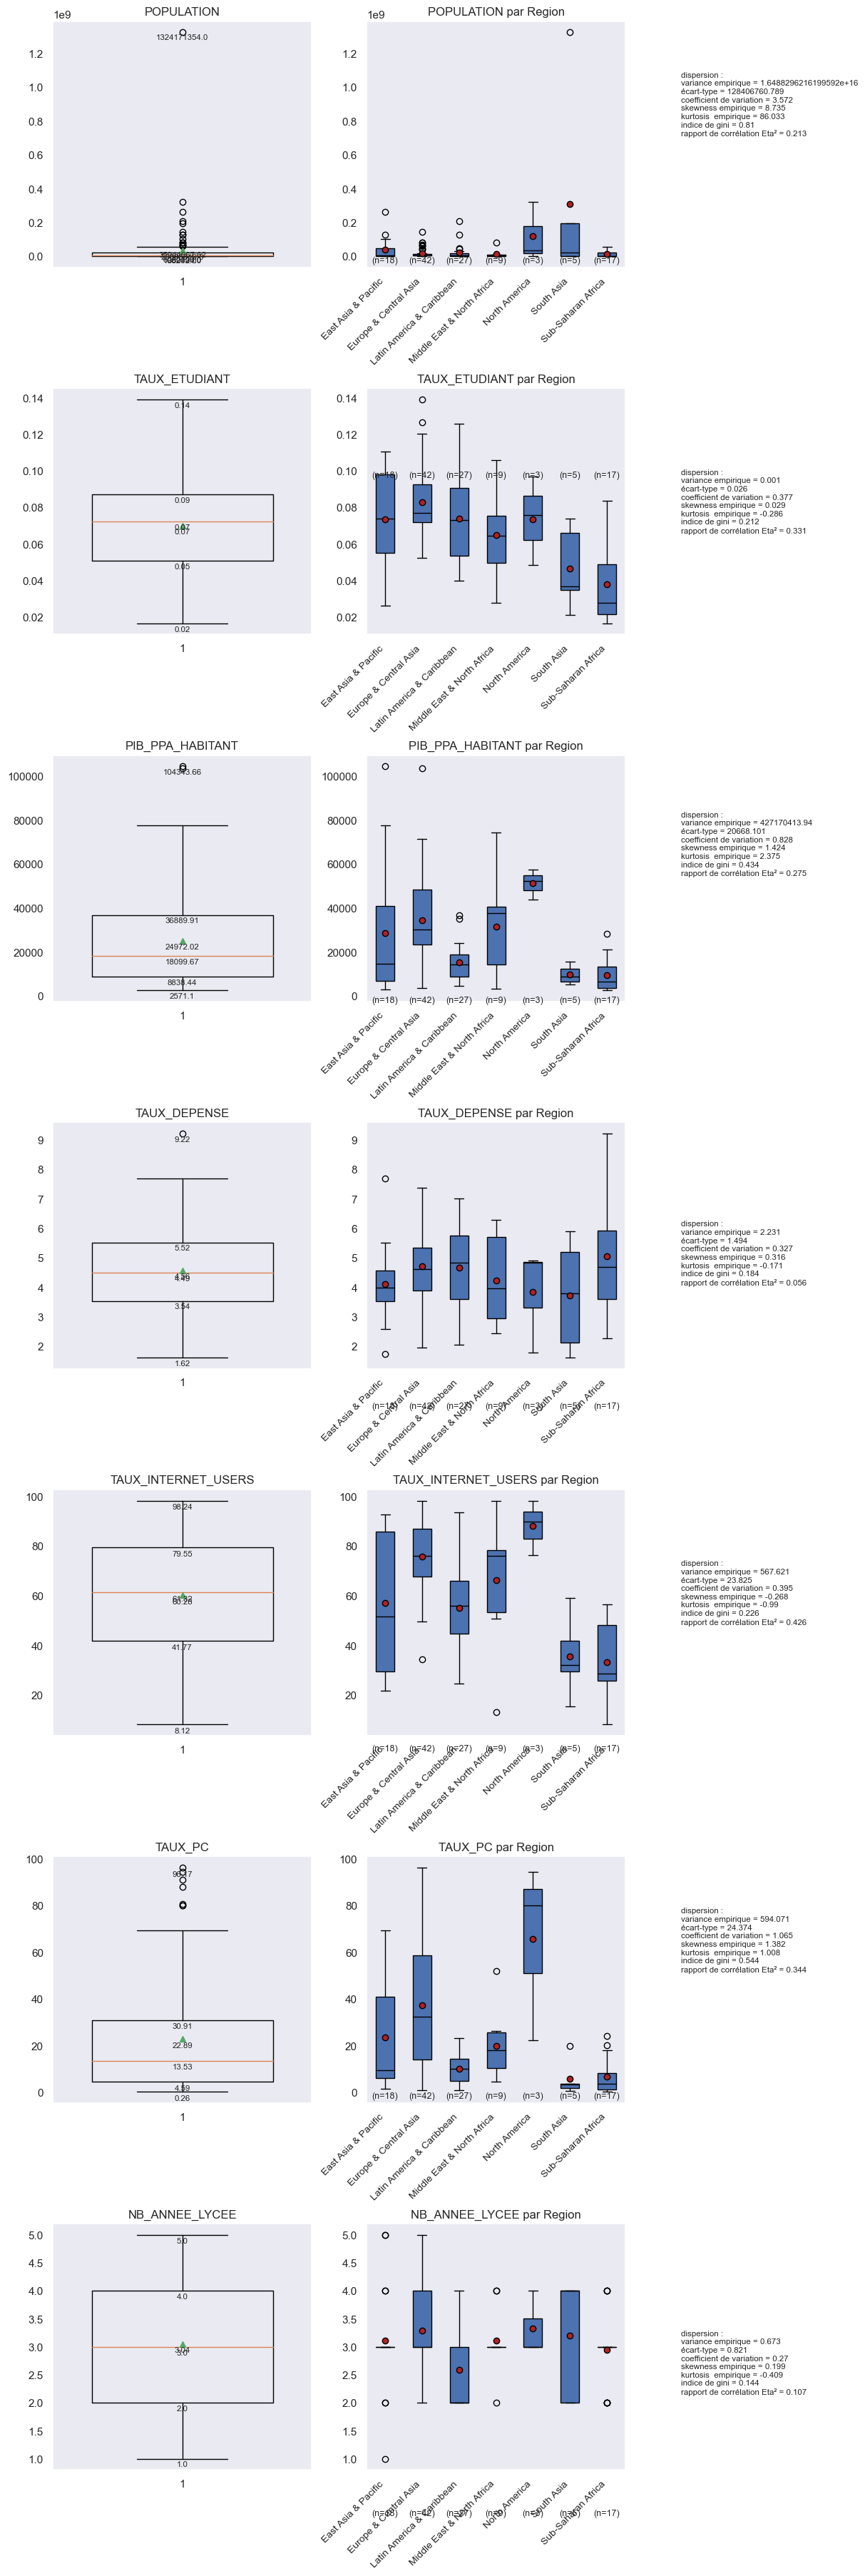

In [258]:
boxplot_region_compare(['POPULATION','TAUX_ETUDIANT','PIB_PPA_HABITANT','TAUX_DEPENSE','TAUX_INTERNET_USERS','TAUX_PC','NB_ANNEE_LYCEE'], df_reorg,12,36)

<span style='font-family:sans-serif'>On remarque que la variable POPULATION se distingue grandement des autres variables. 

En effet, il y a quelques outliers qui s'écartent très fortement de la moyenne comparé aux outliers des autres variables.
Cela est aussi visible dans les calculs de dispersion et notamment dans l'indice de Gini qui est assez proche de 1 (cela est due à la population qui est très élevée en asie).

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_1504\2912966065.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_reorg['POPULATION'],bins=15)


<function matplotlib.pyplot.show(close=None, block=None)>

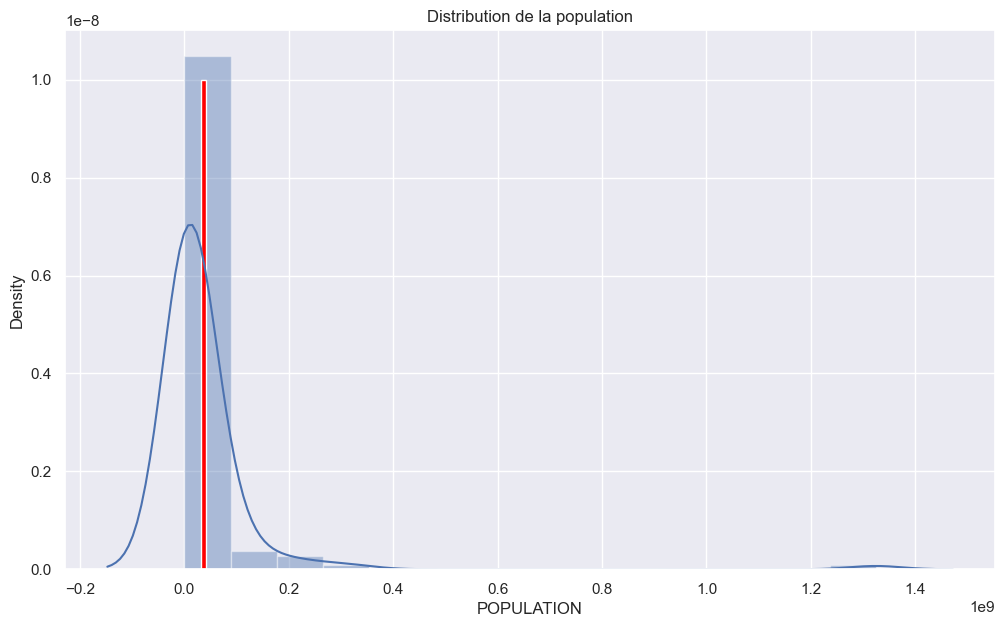

In [259]:
plt.figure()
sb.distplot(df_reorg['POPULATION'],bins=15)
plt.title("Distribution de la population")
plt.bar(x=df_reorg['POPULATION'].mean(),height=0.1*10**(-7) ,width=0.1*10**8, color='red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

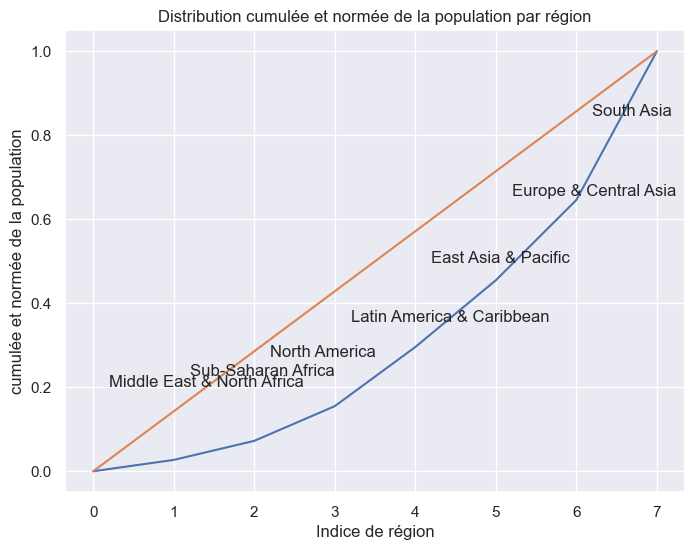

In [260]:
# Trace en bleu la courbe des populations cumulée et normée par région
# en rouge la bissectrice pour illustrer l'indice de gini

dep = df_reorg.groupby('Region')['POPULATION'].sum().values
x_desc=df_reorg.groupby('Region')['POPULATION'].sum().sort_values().index.tolist()
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize=(8,6))
plt.xlabel('Indice de région')
plt.ylabel('cumulée et normée de la population')
plt.title("Distribution cumulée et normée de la population par région")
plt.plot(lorenz)
plt.plot([0,len(lorenz)-1],[0,1])

for i in range(len(x_desc)):
    plt.text(i+0.2, lorenz[i]+0.2, x_desc[i])
    
plt.show

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_1504\3514356825.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_reorg['TAUX_ETUDIANT'],bins=15)


<function matplotlib.pyplot.show(close=None, block=None)>

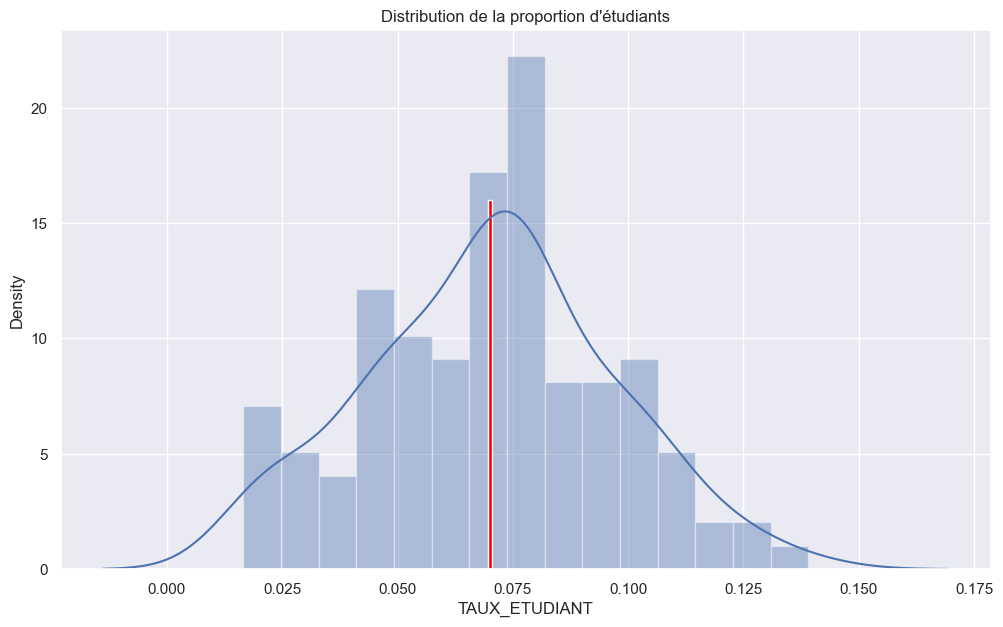

In [261]:
plt.figure()
sb.distplot(df_reorg['TAUX_ETUDIANT'],bins=15)
plt.title("Distribution de la proportion d'étudiants")
plt.bar(x=df_reorg['TAUX_ETUDIANT'].mean(),height=16 ,width=0.001, color='red')
plt.show

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_1504\3096844207.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_reorg['PIB_PPA_HABITANT'],bins=15)


<function matplotlib.pyplot.show(close=None, block=None)>

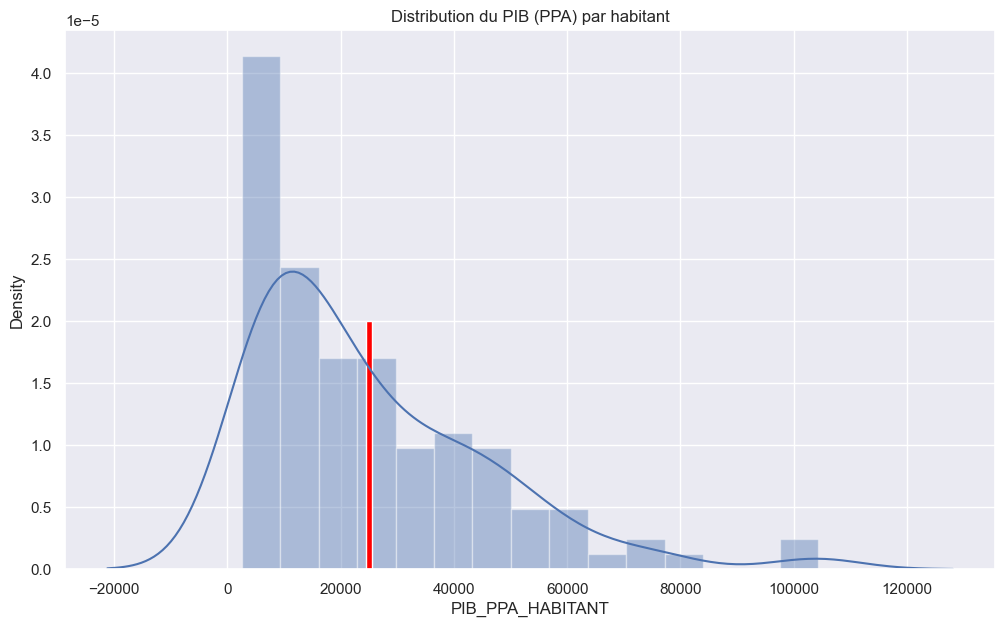

In [262]:
plt.figure()
sb.distplot(df_reorg['PIB_PPA_HABITANT'],bins=15)
plt.title("Distribution du PIB (PPA) par habitant")
plt.bar(x=df_reorg['PIB_PPA_HABITANT'].mean(),height=0.00002 ,width=1000, color='red')
plt.show

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_1504\732412756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_reorg['TAUX_DEPENSE'],bins=15)


<function matplotlib.pyplot.show(close=None, block=None)>

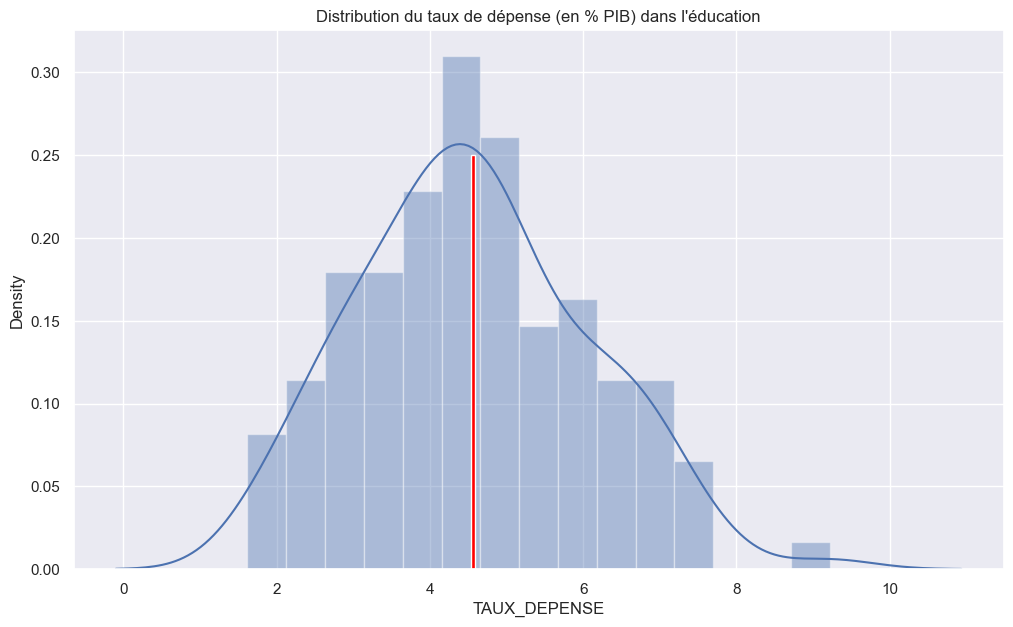

In [263]:
plt.figure()
sb.distplot(df_reorg['TAUX_DEPENSE'],bins=15)
plt.title("Distribution du taux de dépense (en % PIB) dans l'éducation")
plt.bar(x=df_reorg['TAUX_DEPENSE'].mean(),height=0.25 ,width=0.05, color='red')
plt.show

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_1504\2273490022.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_reorg['TAUX_INTERNET_USERS'],bins=15)


<function matplotlib.pyplot.show(close=None, block=None)>

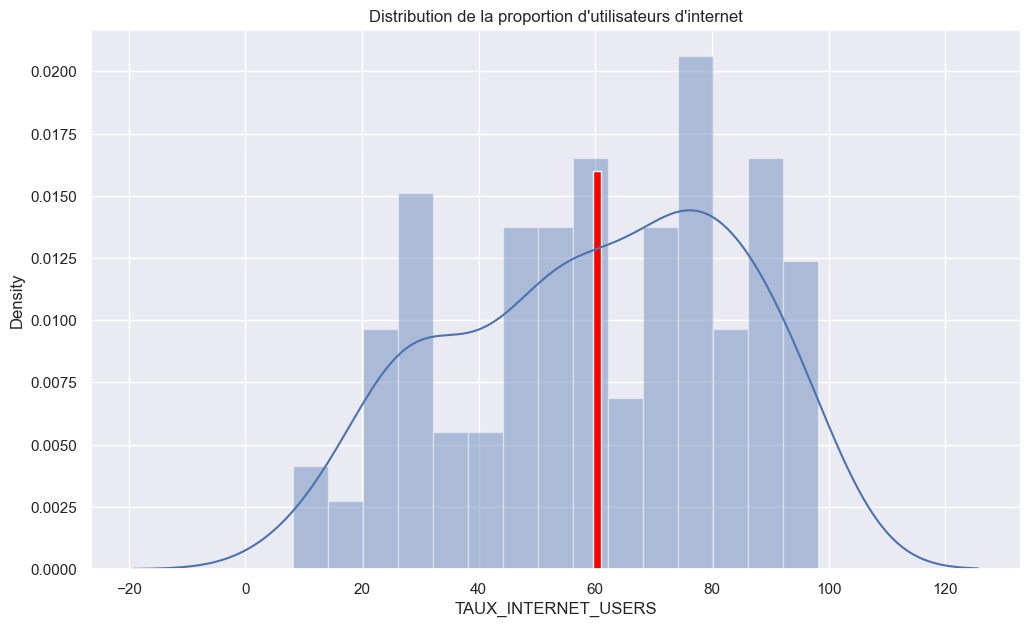

In [264]:
plt.figure()
sb.distplot(df_reorg['TAUX_INTERNET_USERS'],bins=15)
plt.title("Distribution de la proportion d'utilisateurs d'internet")
plt.bar(x=df_reorg['TAUX_INTERNET_USERS'].mean(),height=0.016 ,width=1.5, color='red')
plt.show

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_1504\2628643988.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_reorg['TAUX_PC'],bins=15)


<function matplotlib.pyplot.show(close=None, block=None)>

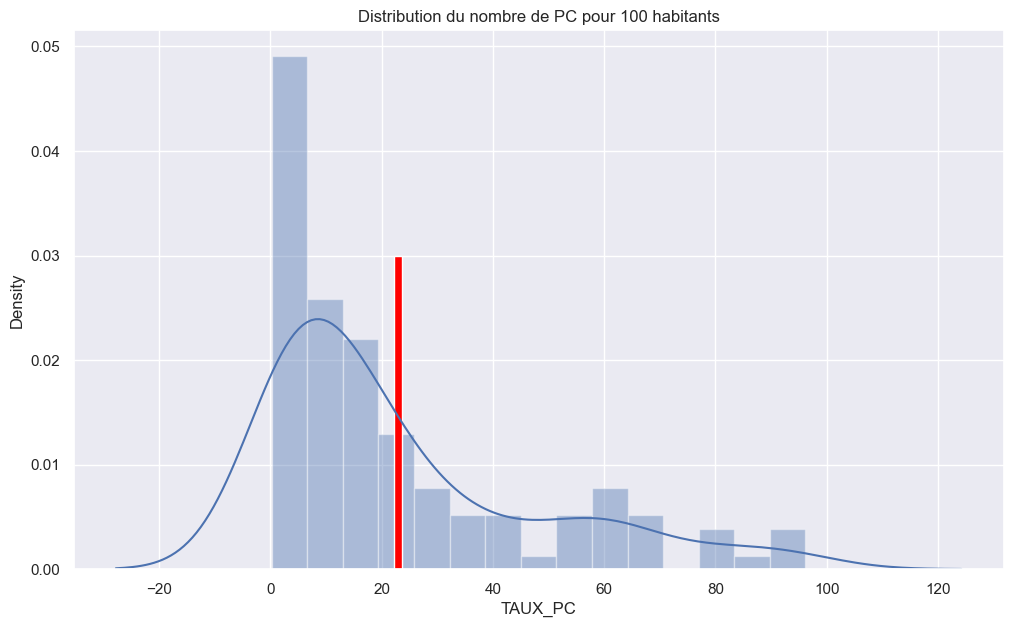

In [265]:
plt.figure()
sb.distplot(df_reorg['TAUX_PC'],bins=15)
plt.title("Distribution du nombre de PC pour 100 habitants")
plt.bar(x=df_reorg['TAUX_PC'].mean(),height=0.03 ,width=1.5, color='red')
plt.show

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_1504\1568803587.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_reorg['NB_ANNEE_LYCEE'],bins=15)


<function matplotlib.pyplot.show(close=None, block=None)>

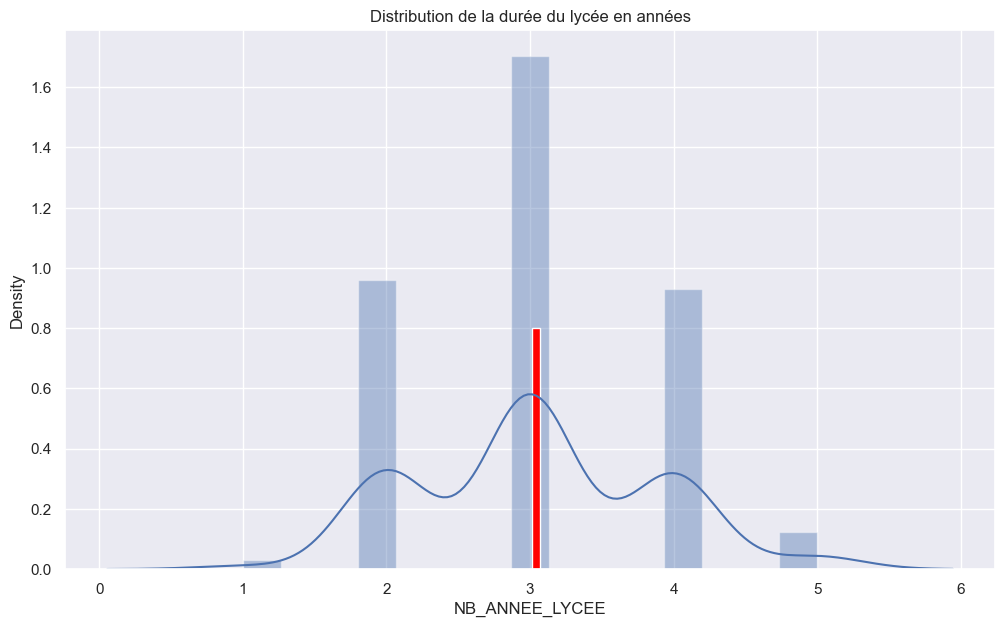

In [266]:
plt.figure()
sb.distplot(df_reorg['NB_ANNEE_LYCEE'],bins=15)
plt.title("Distribution de la durée du lycée en années")
plt.bar(x=df_reorg['NB_ANNEE_LYCEE'].mean(),height=0.8 ,width=0.05, color='red')
plt.show

<span style='font-family:sans-serif'>Dans la suite de ce notebook, je défini une variable de score qui combine les indicateurs. En raison de la dispersion de la variable POPULATION j'ai décidé de la combiner à d'autres variables mais ne sera pas présente en tant qu'indicateur. 

Ce score sera une combinaison de sous-score calculé pour chaque variable.

Chaque sous-score est égal au rapport entre la valeur de l'indicateur et la valeur moyenne de l'indicateur tout pays confondus. J'ai décidé de diviser par la valeur moyenne afin de moins discriminer certains pays que si j'avais divisé par la valeur maximum compte tenu des écarts.

In [267]:
# calcul d'un score général pour chaque pays 
# égal au rapport de sa valeur sur la valeur max

SCORE_ETUDIANT = df_reorg['TAUX_ETUDIANT'] / df_reorg['TAUX_ETUDIANT'].mean()
SCORE_POUVOIR_ACHAT = df_reorg['PIB_PPA_HABITANT'] / df_reorg['PIB_PPA_HABITANT'].mean()
SCORE_DEPENSE = df_reorg['TAUX_DEPENSE'] / df_reorg['TAUX_DEPENSE'].mean()
SCORE_INTERNET = df_reorg['TAUX_INTERNET_USERS'] / df_reorg['TAUX_INTERNET_USERS'].mean()
SCORE_PC = df_reorg['TAUX_PC'] / df_reorg['TAUX_PC'].mean()
SCORE_ANNEE_LYCEE = df_reorg['NB_ANNEE_LYCEE'] / df_reorg['NB_ANNEE_LYCEE'].mean()

In [268]:
# on ne prend pas la population qui a une grande influence sur le score final sans pour autant avoir de sens. 
# D'autant que les données sur la population est déjà contenu dans d'autres variables (tel que TAUX_ETUDIANT).

# Le score attribué à chaque pays est la moyenne des scores calculé pour chaque indicateur.
SCORE_SYNT=(SCORE_ETUDIANT+SCORE_DEPENSE+SCORE_INTERNET+SCORE_PC+SCORE_ANNEE_LYCEE+SCORE_POUVOIR_ACHAT)/6
df_reorg['SCORE_SYNT']=SCORE_SYNT

#### <span style='font-family:sans-serif'>Section 3.4 Détermination de scores par pays <a class="anchor" id="section_3_4"></a>

In [269]:
# tri les pays par score et affiche les 20 premiers.
df_score=df_reorg.sort_values('SCORE_SYNT', ascending=False)
display(df_score.head(20))

Indicator Name,Region,Country Name,TAUX_ETUDIANT,PIB_PPA_HABITANT,TAUX_DEPENSE,TAUX_INTERNET_USERS,TAUX_PC,NB_ANNEE_LYCEE,POPULATION,SCORE_SYNT
56,Europe & Central Asia,Switzerland,0.077087,63741.452507,4.90459,89.405568,96.170657,4.0,8372098.0,1.954642
41,Europe & Central Asia,Luxembourg,0.052308,103556.591156,3.40088,97.493930,68.209751,4.0,582972.0,1.925263
55,Europe & Central Asia,Sweden,0.093970,49507.845714,6.99324,91.506828,88.011928,3.0,9903122.0,1.867725
44,Europe & Central Asia,Netherlands,0.093370,51319.518152,4.87121,90.410959,90.987849,3.0,17018408.0,1.819531
59,Europe & Central Asia,United Kingdom,0.099761,43080.956403,5.03482,94.775801,80.170361,4.0,65637239.0,1.773848
35,Europe & Central Asia,Iceland,0.126390,51398.926506,6.62588,98.240016,53.210417,4.0,334252.0,1.764162
45,Europe & Central Asia,Norway,0.099010,59384.811722,6.35422,97.298204,62.775903,3.0,5232929.0,1.754592
97,North America,Canada,0.075608,44025.183426,4.90952,89.840000,94.446705,3.0,36286425.0,1.753563
98,North America,United States,0.096767,57638.159088,4.82599,76.176737,79.915488,3.0,323127513.0,1.748166
27,Europe & Central Asia,Denmark,0.109074,49818.804707,7.28274,96.967785,54.869173,3.0,5731118.0,1.690137


<span style='font-family:sans-serif'>A partir de ce système de scores nous obtenons la liste des pays suivants en ne gardant que les meilleurs scores.

In [270]:
df_score.iloc[:20,[0,1,9]]

Indicator Name,Region,Country Name,SCORE_SYNT
56,Europe & Central Asia,Switzerland,1.954642
41,Europe & Central Asia,Luxembourg,1.925263
55,Europe & Central Asia,Sweden,1.867725
44,Europe & Central Asia,Netherlands,1.819531
59,Europe & Central Asia,United Kingdom,1.773848
35,Europe & Central Asia,Iceland,1.764162
45,Europe & Central Asia,Norway,1.754592
97,North America,Canada,1.753563
98,North America,United States,1.748166
27,Europe & Central Asia,Denmark,1.690137


<span style='font-family:sans-serif'>On peut voir que globalement les valeurs de score se répartissent sur tous les pays et que chaque régions possède un large spectre d'attractivité de pays.

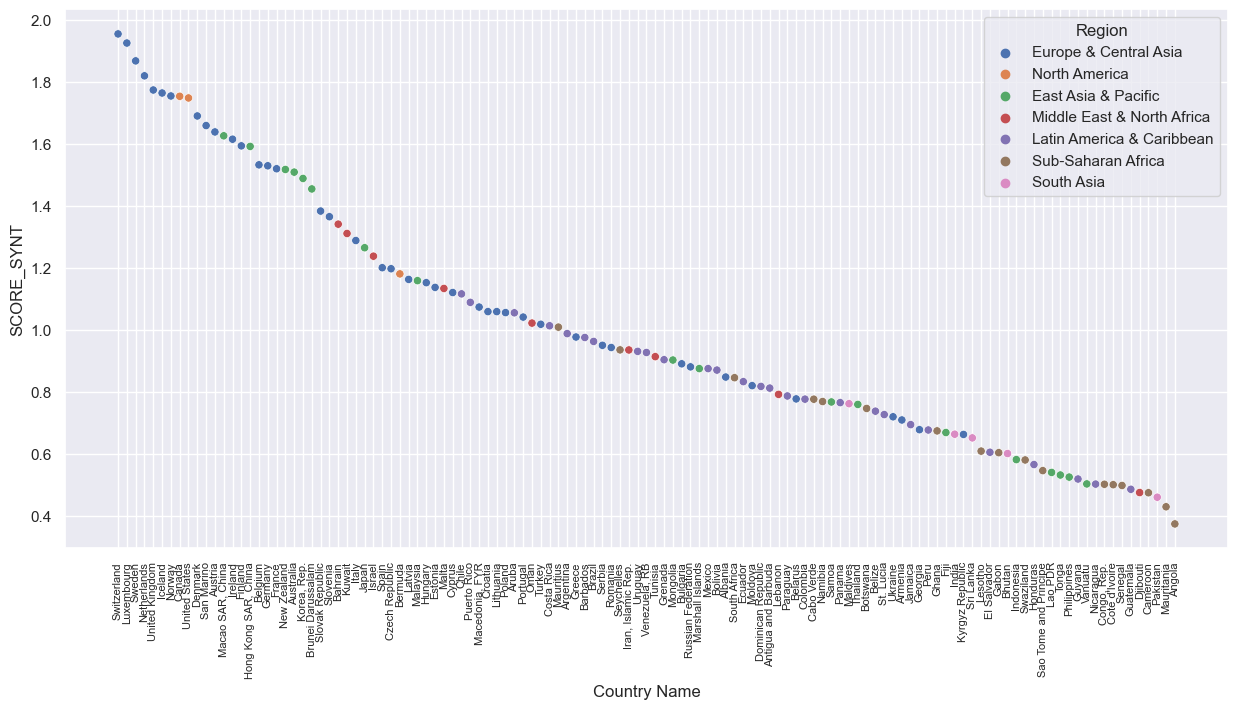

In [271]:
plt.figure(figsize=(15,7))
sb.scatterplot(df_score, x='Country Name',y='SCORE_SYNT', hue='Region')
plt.rcParams.update({'font.size':17})
p=plt.xticks(fontsize=8, rotation=90)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_1504\2646711542.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_reorg['SCORE_SYNT'],bins=15)


<function matplotlib.pyplot.show(close=None, block=None)>

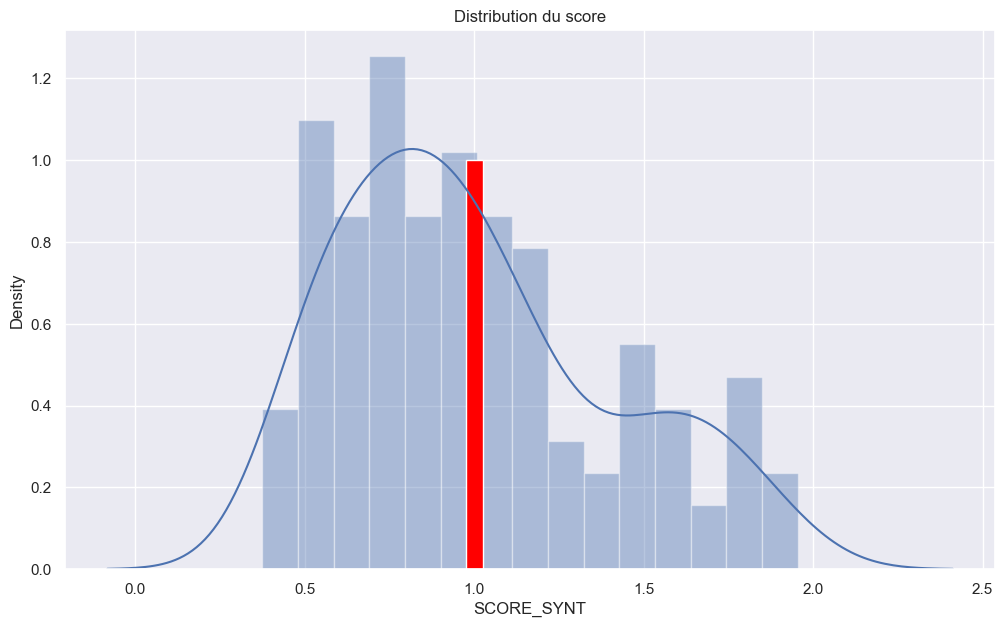

In [272]:
plt.figure()
sb.distplot(df_reorg['SCORE_SYNT'],bins=15)
plt.title("Distribution du score")
plt.bar(x=df_score['SCORE_SYNT'].mean(),height=1 ,width=0.05, color='red')
plt.show

<span style='font-family:sans-serif'>Les deux figures ci-dessous montrent que les régions Sub-Saharan Africa et South Asia ont un score moyen très écarté des autres régions.

En effet, la valeur du rapport de corrélation passe de 0.269 à 0.397 selon que l'on exclut ces régions ou non dans le calcul.

<span style='font-family:sans-serif'>Cette première figure présente un rapport de corrélation de 0.269 entre le score et la région.

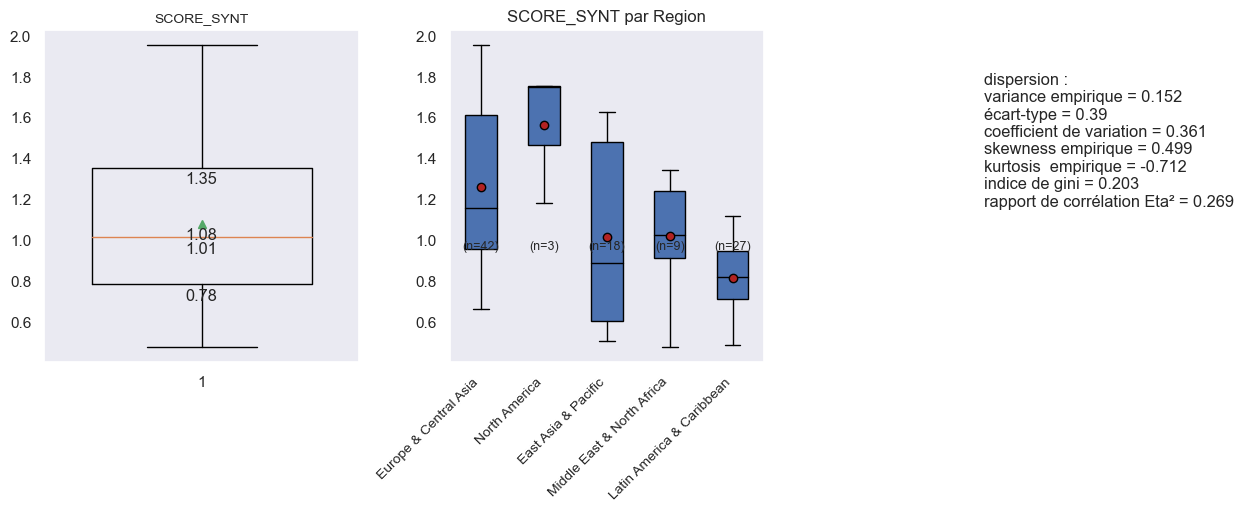

In [273]:
#Répartition des scores par région sans Sub-Saharan Africa et South Asia
mask=((df_score['Region']=='Sub-Saharan Africa') | (df_score['Region']=='South Asia'))
boxplot_region_compare_1_variable('SCORE_SYNT', df_score.loc[~mask], 12,5)

<span style='font-family:sans-serif'>Mais si l'on rajoute Sub-Saharan Africa et South Asia celui-ci passe à 0.397.

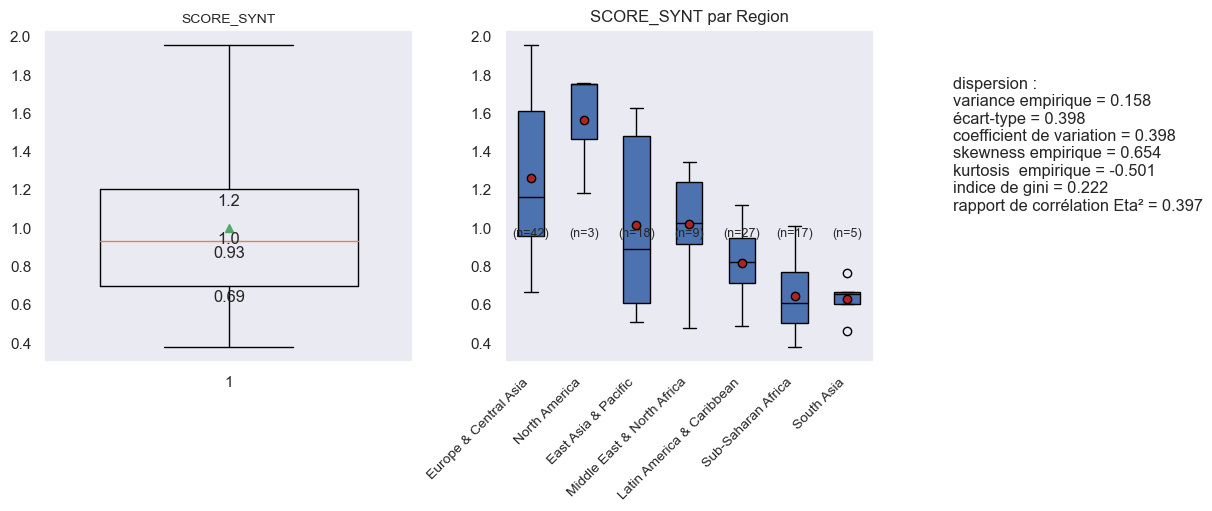

In [274]:
# répartition des scores avec toues les régions
boxplot_region_compare_1_variable('SCORE_SYNT', df_score, 12,5)

#### <span style='font-family:sans-serif'>Section 3.5 Poids des variables dans le score <a class="anchor" id="section_3_5"></a>

<span style='font-family:sans-serif'>L'affichage de la matrice de corrélation permet de visualiser la corrélation entre chaque variable et le calcul du score.

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_1504\2366141976.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df_reorg.corr(method ='pearson'),annot=True, fmt=".2f")


<Axes: xlabel='Indicator Name', ylabel='Indicator Name'>

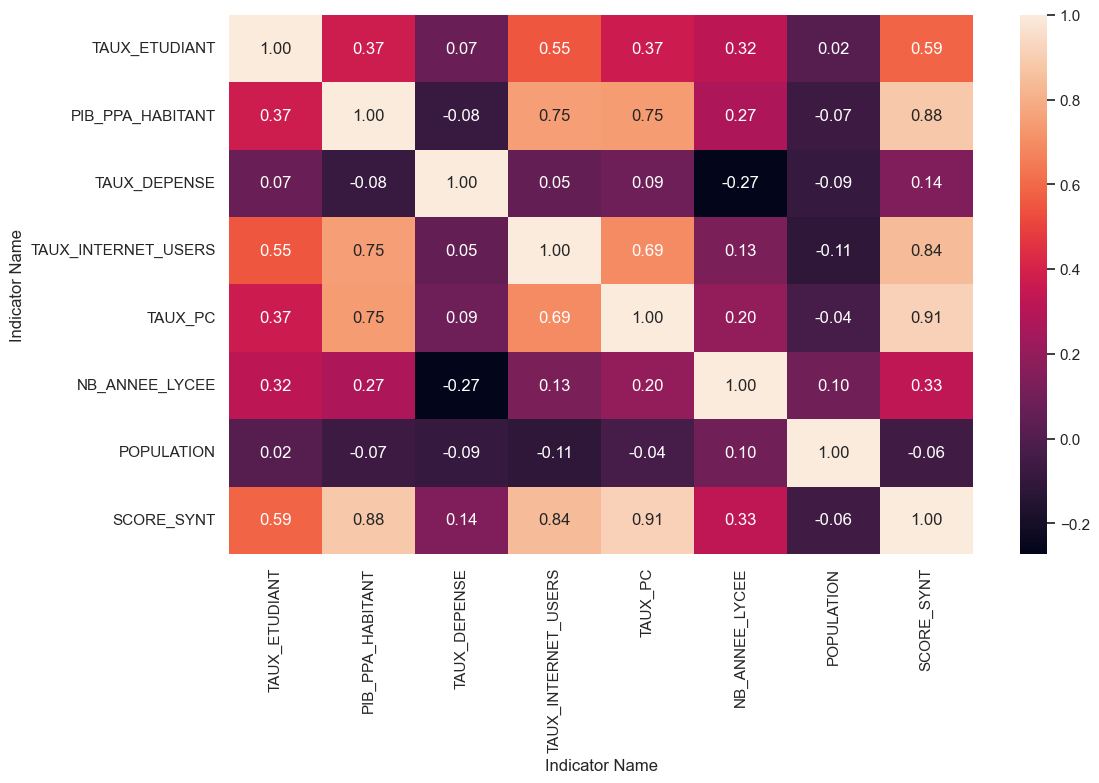

In [275]:
#Voyons les corrélations linéaires entre le score synthétique et les autres variables
sb.set(rc={"figure.figsize": (12, 7)})
sb.heatmap(df_reorg.corr(method ='pearson'),annot=True, fmt=".2f")

<span style='font-family:sans-serif'>On remarque que chaque indicateur n'a pas la même influence sur les valeurs de score.

La corrélation linéaire est bien plus importante avec le PIB par habitant et le taux de dépenses par exemple.

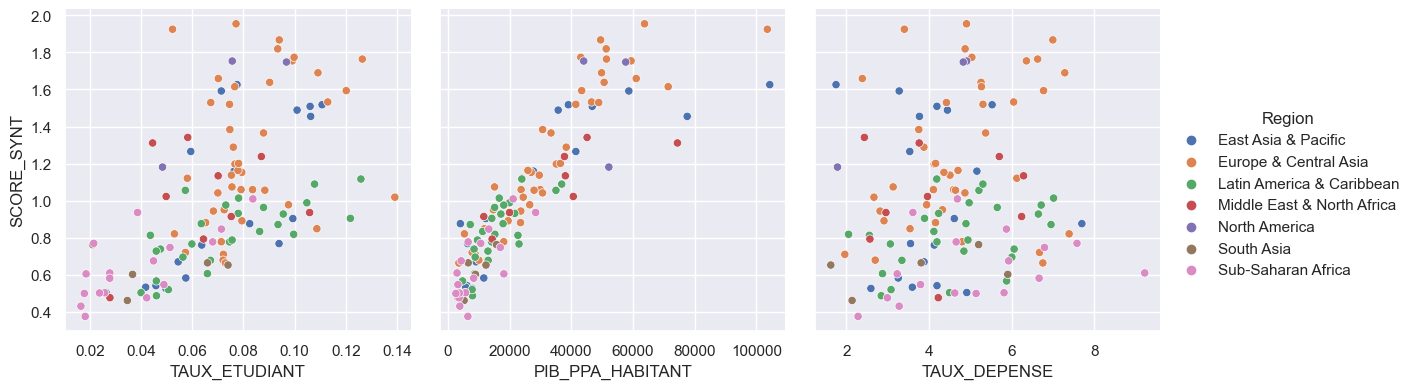

In [276]:
# Graphiques nuage de points illustrant les corrélation avec le score

CORR_2=sb.PairGrid(df_reorg,hue='Region',x_vars=['TAUX_ETUDIANT','PIB_PPA_HABITANT','TAUX_DEPENSE'],y_vars=["SCORE_SYNT"], height=4)
CORR_2.map_offdiag(sb.scatterplot)
CORR_2.add_legend()

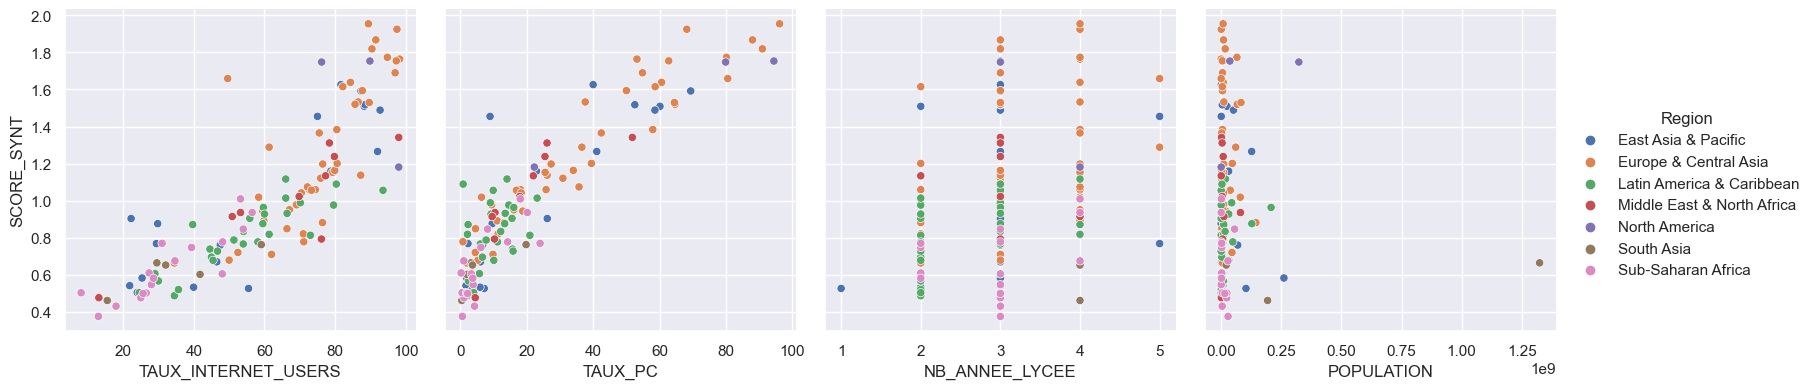

In [277]:
CORR_2=sb.PairGrid(df_reorg,hue='Region',x_vars=['TAUX_INTERNET_USERS','TAUX_PC','NB_ANNEE_LYCEE','POPULATION'],y_vars=["SCORE_SYNT"], height=4)
CORR_2.map_offdiag(sb.scatterplot)
CORR_2.add_legend()

<span style='font-family:sans-serif'>En examinant de prêt on peut voir que cela réordonne légèrement le classe sans pour autant le changer complètement.

In [278]:
df_meilleurs_pays=df_score.iloc[:20,[0,1,9]]
display(df_meilleurs_pays)

Indicator Name,Region,Country Name,SCORE_SYNT
56,Europe & Central Asia,Switzerland,1.954642
41,Europe & Central Asia,Luxembourg,1.925263
55,Europe & Central Asia,Sweden,1.867725
44,Europe & Central Asia,Netherlands,1.819531
59,Europe & Central Asia,United Kingdom,1.773848
35,Europe & Central Asia,Iceland,1.764162
45,Europe & Central Asia,Norway,1.754592
97,North America,Canada,1.753563
98,North America,United States,1.748166
27,Europe & Central Asia,Denmark,1.690137


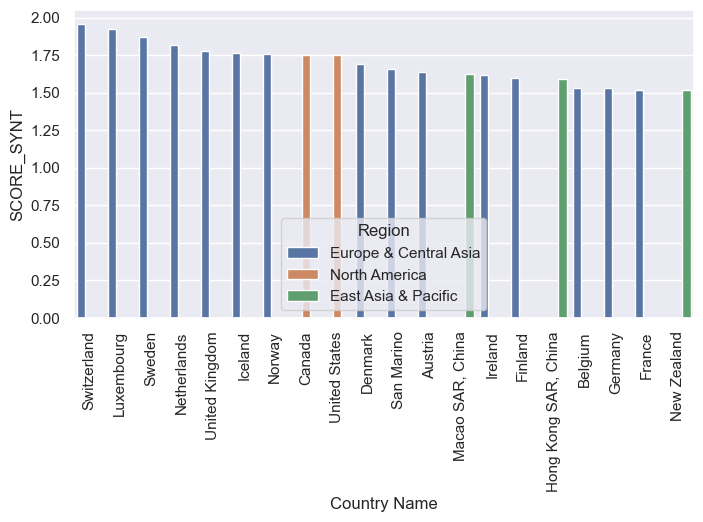

In [279]:
# diagrame en barres du classement
plt.figure(figsize=(8,4))
sb.barplot(df_meilleurs_pays,x='Country Name',y='SCORE_SYNT',hue='Region')
labels=plt.xticks(rotation=90)

<span style='font-family:sans-serif'>En conclusion, après un exercice de nettoyage, les données de la banque mondiale se sont révélées suffisamment riche en informations pour réaliser une pré-analyse et obtenir une première vue d'ensemble des pays ayant un bon potentiel pour une expansion à l'international de nos services de formation en ligne pour des élèves de lycée et université.

Ainsi, compte tenu des hypothèses choisies et des choix effectués au cours de l'analyse, les 20 pays ayant le plus fort potentiel se situent principalement en Europe, en particulier au Nord et à l'Est.
Ce sont des zones très développées, à fort pouvoir d'achat, l'éducation y représente une grande part des dépenses gouvernementales, et la grande majorité de la population possède des ordinateurs avec une connexion à internet ce qui explique leur forte attractivité.

Parmi les pays attractifs, on retrouve sans grande surprise l'amérique du Nord avec le Canada et les Etats-Unis qui font partie des pays les plus développés au monde et représentent donc une clientèle très intéressantes au vue de notre expansion à l'international.

Enfin, nous retrouvons des pays d'Asie et du Pacifique comme Macao et Hong Kong en Chine et l'Australie et la Corée du Sud qui se sont révélés très attractive au vue des filtres appliqués via les indicateurs construits.